# PROJECT TEAM ID : "PTID-CDS-JUL-23-1571"

# PROJECT TEAM MEMBERS

- THIRUNAVUKKARASU K A (parthiru2651@gmail.com)
- ARJUN M (0203arjun@gmail.com)
- DIVYA R (divyardivya2020@gmail.com)

# PROJECT ID : "PRCP-1025-FlightPricePrediction"

# PROBLEM STATEMENT

- Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

* Task 1:-Prepare a complete data analysis report on the given data.

- Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

# IMPORT BASIC LIBRARIES

In [322]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# LOAD DATASET

In [323]:
# Loading Dataset
data = pd.read_excel('Flight_Fare.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# BASIC CHECKS

In [324]:
# Display The First 5 Rows
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [325]:
# Display The Last 5 Rows
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [326]:
# shape of dataset
data.shape

(10683, 11)

- The Given Dataset As 10683 Rows & 11 Columns (Feature)

In [327]:
# size of dataset
data.size

117513

In [328]:
# column in dataset total column 11
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [329]:
# data type object except price
# Checking The Feature Infofomation Includes Datatypes & Null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [330]:
# Checking Null Values
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- They Have Only one null value in route & total_stops

In [331]:
# Checking Duplicated Value
data.duplicated().sum()

220

- They Given Dataset As 220 Duplicated Value

In [332]:
# Checking Datatypes
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

- all given dataset feature object data type except price (int)

In [333]:
# statical anlysis for integer value
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


- average price of ticket is 9087.06
- minimum price for ticket 1759
- maximum price of ticket 79512
- standard deviation from mean 4611.35

In [334]:
# statical value for object data type
data.describe(include=['O']).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


# DOMAIN ANALYSIS

- 1)  Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
* 2)  Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.
- 3)  Source: This column holds the name of the place from where the passenger’s journey will start.
* 4)  Destination: This column holds the name of the place to where passengers wanted to travel.
- 5)  Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
* 6)  Arrival_Time: Arrival time is when the passenger will reach his/her destination.
- 7)  Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
* 8)  Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
- 9)  Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
* 10) Price: Price of the flight for a complete journey including all the expenses before onboarding.


## Task 1:-  Prepare a complete data analysis report on the given data.

# EDA

## UNIVARIATE

In [335]:
# sweetviz report

import sweetviz as sv
FLIGHT=sv.analyze(data)
FLIGHT.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


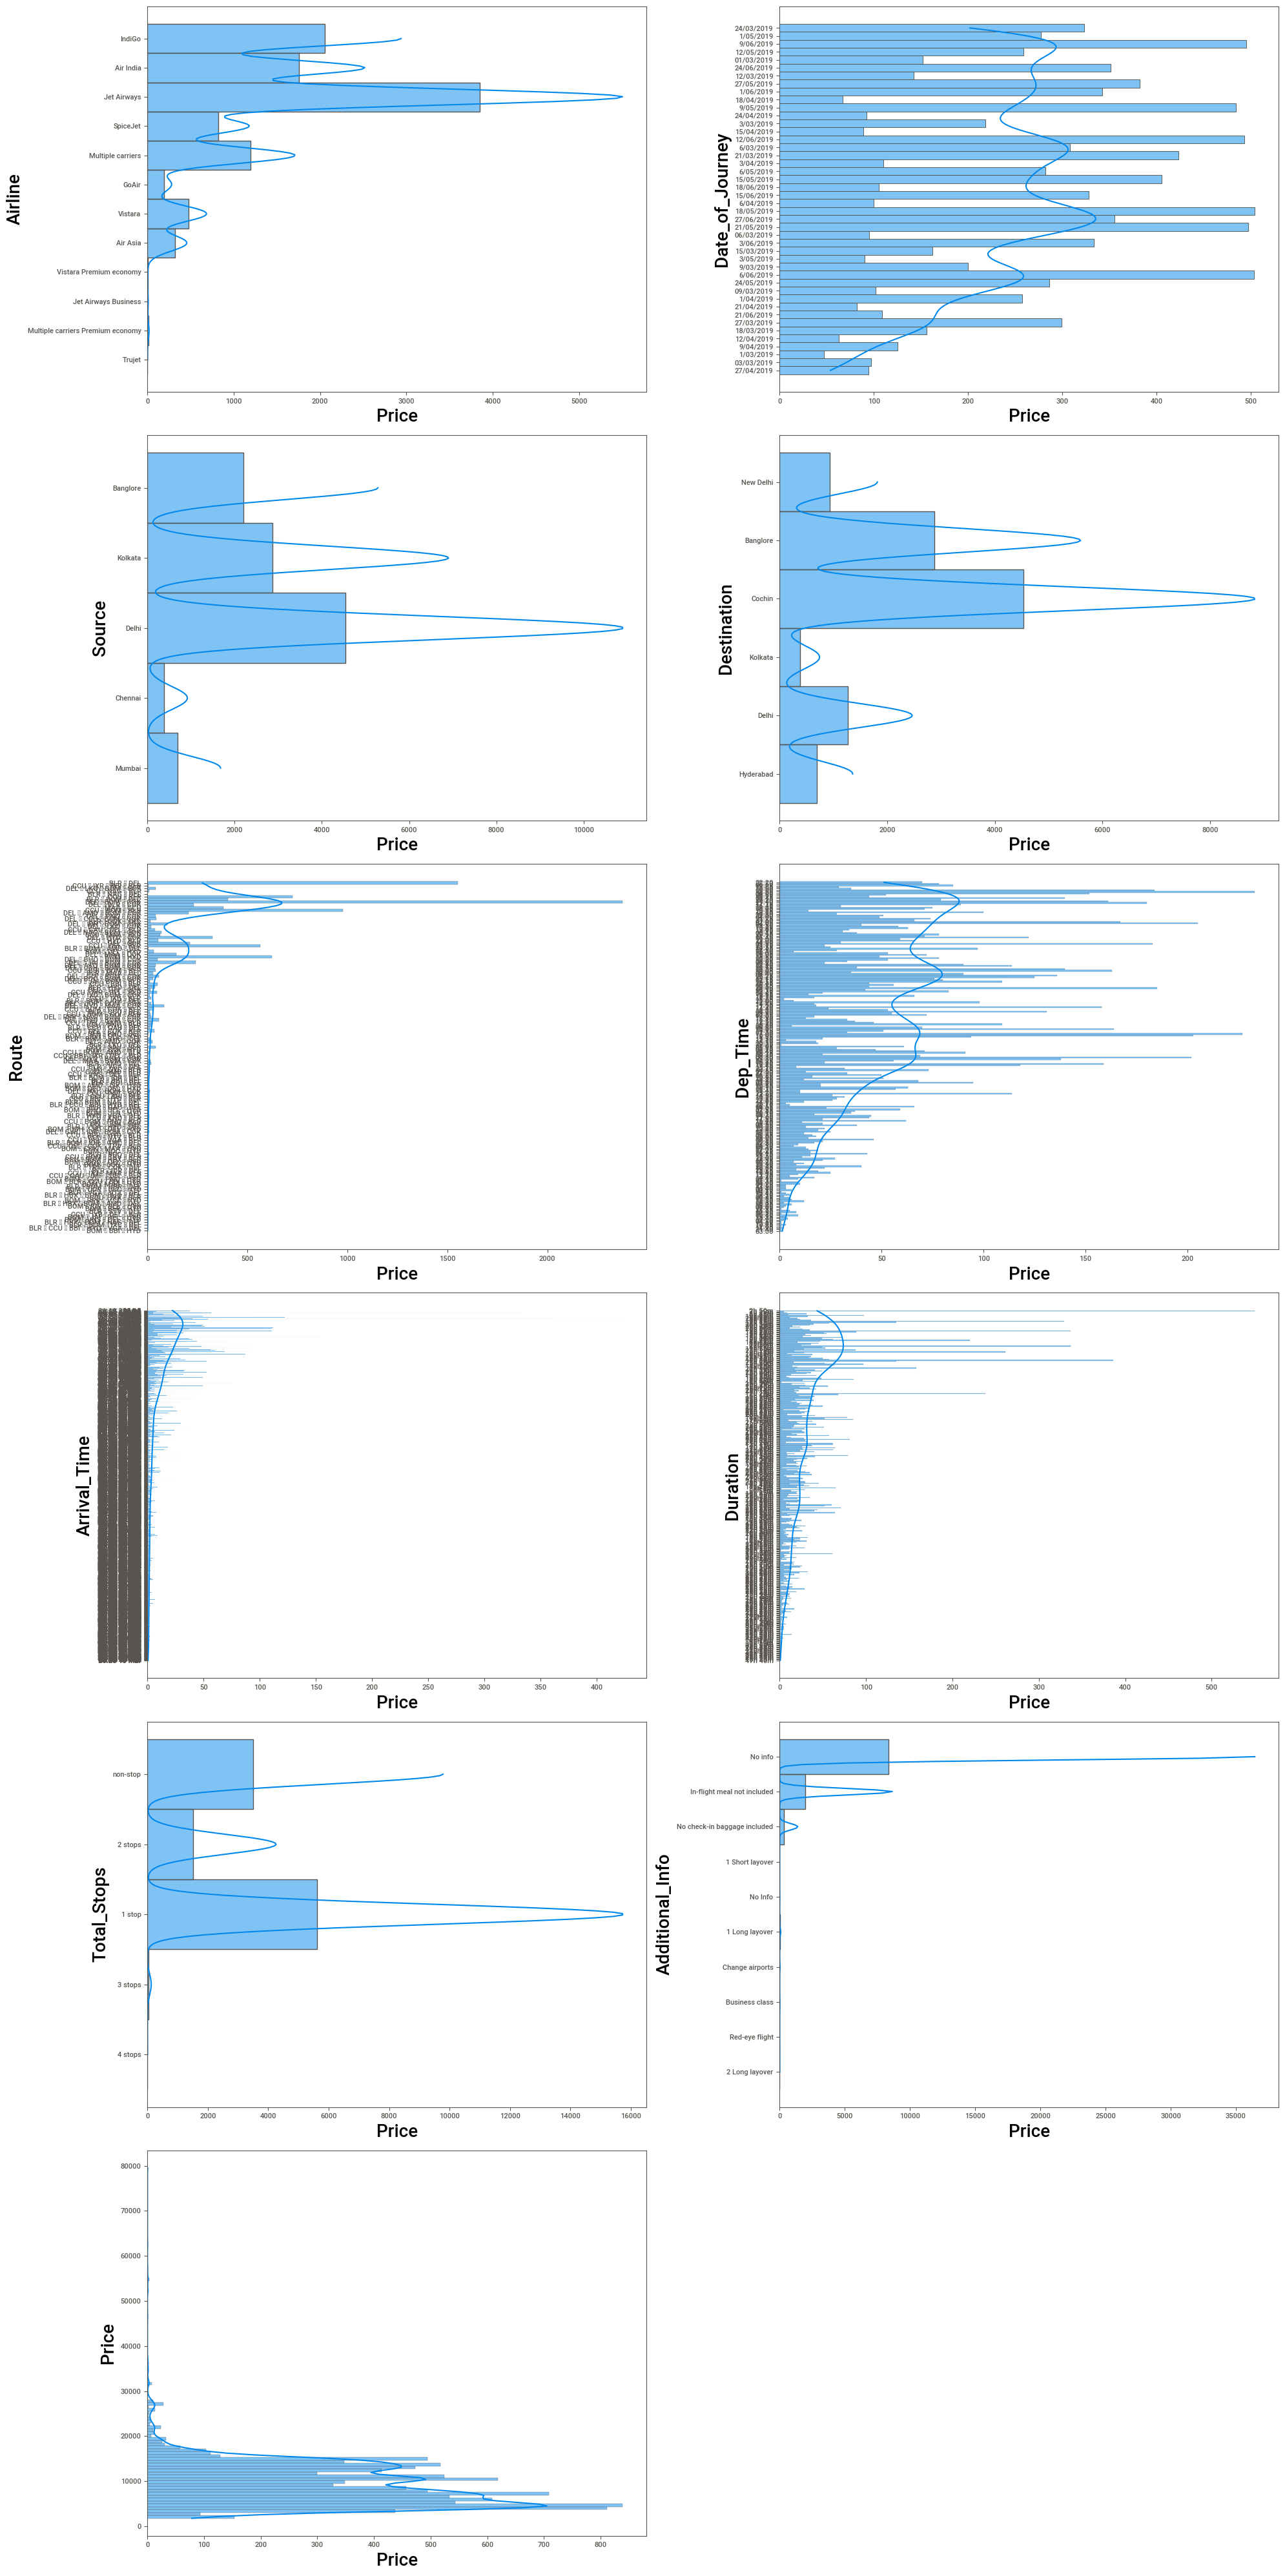

In [336]:
# Checking Distribution of The Given Dataset Using For Loop Condition

plt.figure(figsize=(20,40))
plotnumber=1

for i in data:
    if plotnumber<12:
        plot=plt.subplot(6,2,plotnumber)
        sns.histplot(y=data[i],kde=True)
        plt.ylabel(i,fontsize=20)
        plt.xlabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

- All The Feature Are Abnormal Distribution

<Axes: xlabel='Count', ylabel='Airline'>

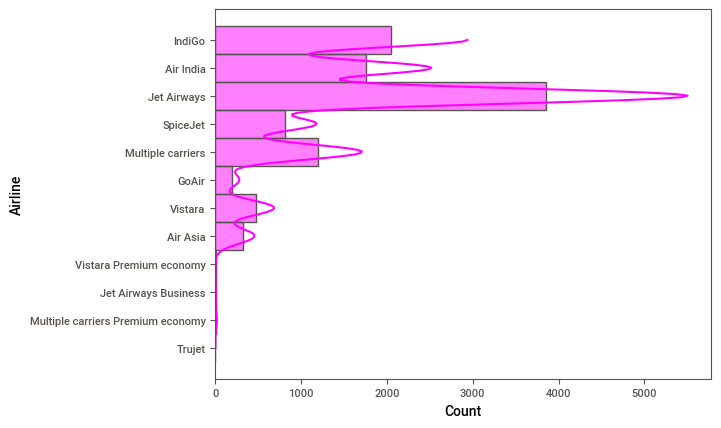

In [337]:
# Checking Distribution of 'Airline' Feature Using Histplot

sns.histplot(y='Airline',data=data,kde=True,color='magenta')

- MOST OF THE PEOPLE LIKES "JET AIRWAYS"
- FEW PEOPLE LIKES "TRUJET"
- Abnormal Distribution

<Axes: xlabel='Count', ylabel='Date_of_Journey'>

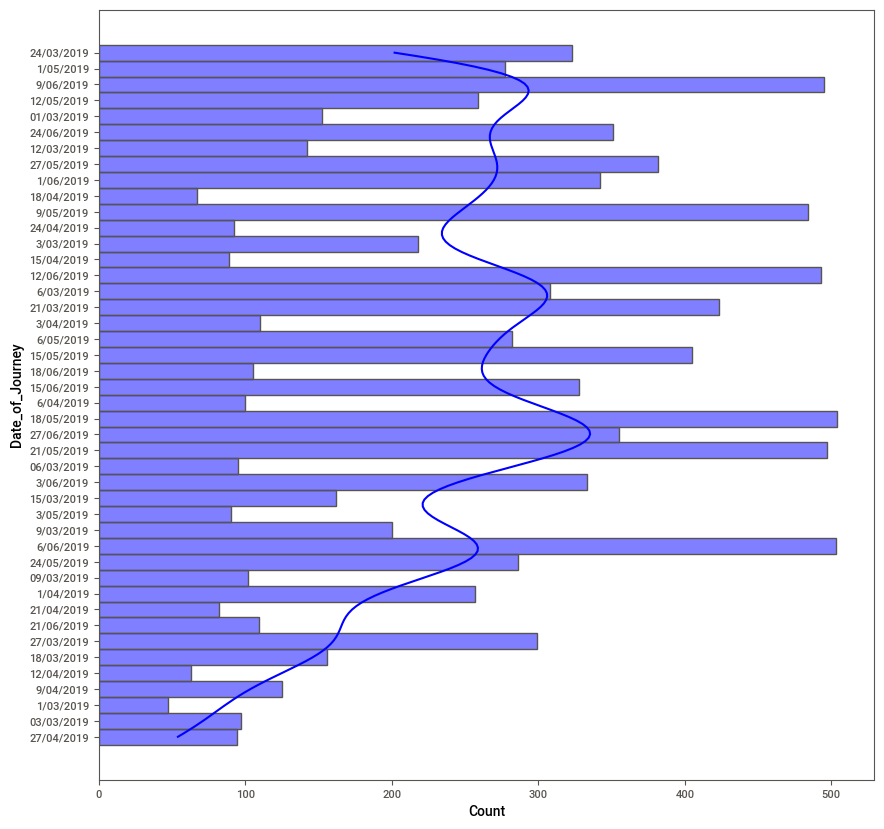

In [338]:
# Checking Distribution of 'Date_of_Journey' Feature Using Histplot

plt.figure(figsize=(10,10))
sns.histplot(y='Date_of_Journey',data=data,kde=True,color='blue')

- MOST OF THE PEOPLE TRAVALED IN 18/05/2019 & 6/06/2019
- Abnormal Distribution

<Axes: xlabel='Count', ylabel='Source'>

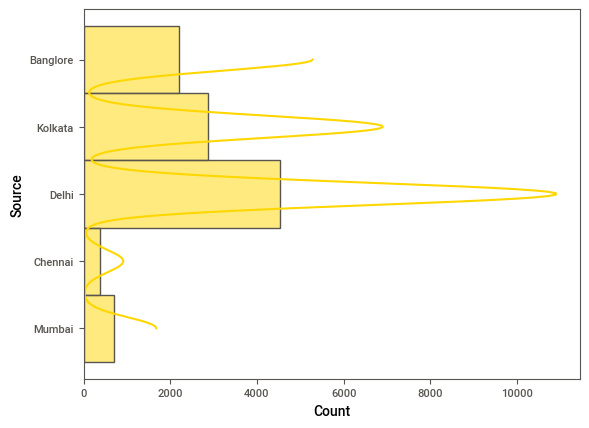

In [339]:
# Checking Distribution of 'Source' Feature Using Histplot

sns.histplot(y='Source',data=data,kde=True,color='gold')

- MOST OF THE PEOPLE STARTS WITH "DELHI"
- FEW PEOPLE STARTS WITH "CHENNAI"
- Abnormal Distribution

<Axes: xlabel='Count', ylabel='Destination'>

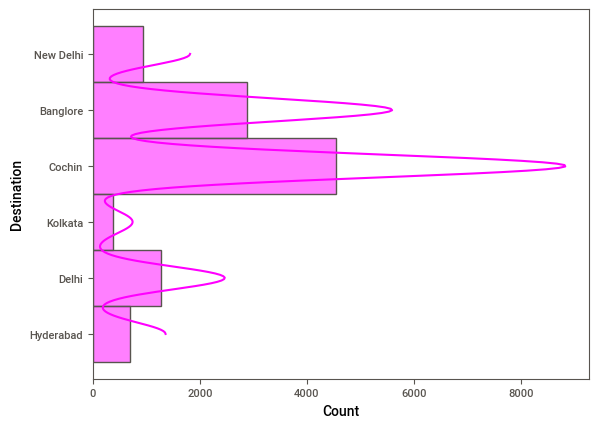

In [340]:
# Checking Distribution of 'Destination' Feature Using Histplot

sns.histplot(y='Destination',data=data,kde=True,color='magenta')

- MOST OF THE PEOPLE GOES TO "COCHIN"
- FEW OF THE PEOPLE GOES TO "KOLKATA"
- Abnormal Distribution

<Axes: xlabel='Count', ylabel='Total_Stops'>

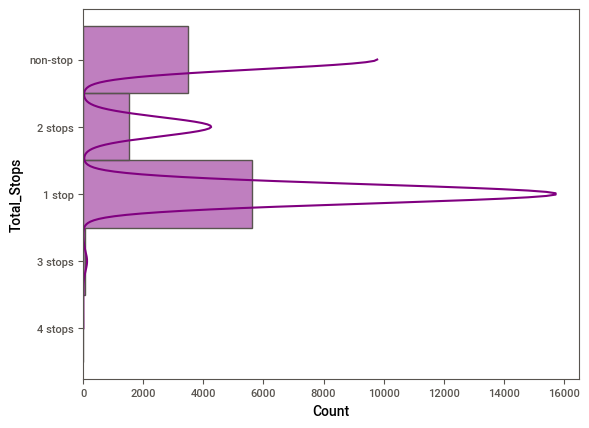

In [341]:
# Checking Distribution of 'Totel_Stops' Feature Using Histplot

sns.histplot(y='Total_Stops',data=data,kde=True,color='purple')

- MOST OF THEM GOES TO "1 STOP" SERVICE
- RARELY GOES TO "4 STOP" SERVICE
- Abnormal Distribution

<Axes: xlabel='Count', ylabel='Additional_Info'>

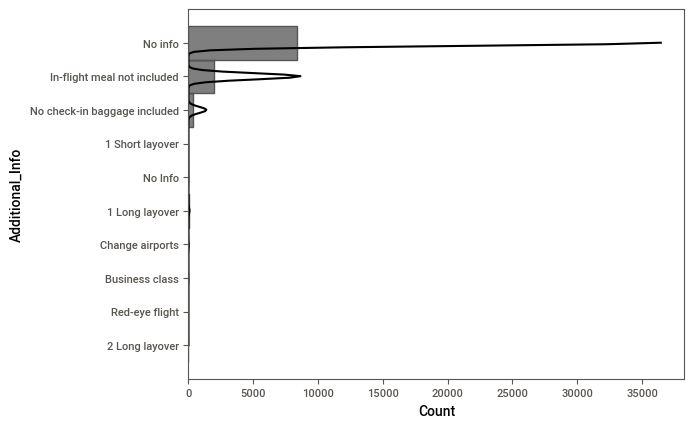

In [342]:
# Checking Distribution of 'Additional_Info' Feature Using Histplot

sns.histplot(y='Additional_Info',data=data,kde=True,color='black')

- Lot of Passengers Information Notyet
- Abnormal Distribution
- Most passenger doesn't choose additonal service

<Axes: xlabel='Count', ylabel='Price'>

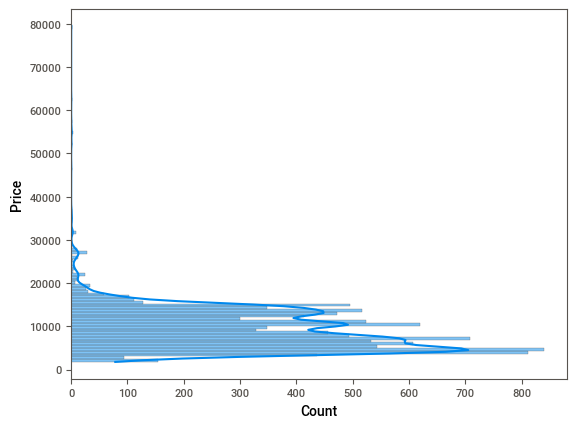

In [343]:
# Checking Distribution of 'Price' Feature Using Histplot

sns.histplot(y='Price',data=data,kde=True)

- most of passenger prefers to travel in lower fare rather than higher fare

## BIVARIATE 

<Axes: xlabel='Price', ylabel='Airline'>

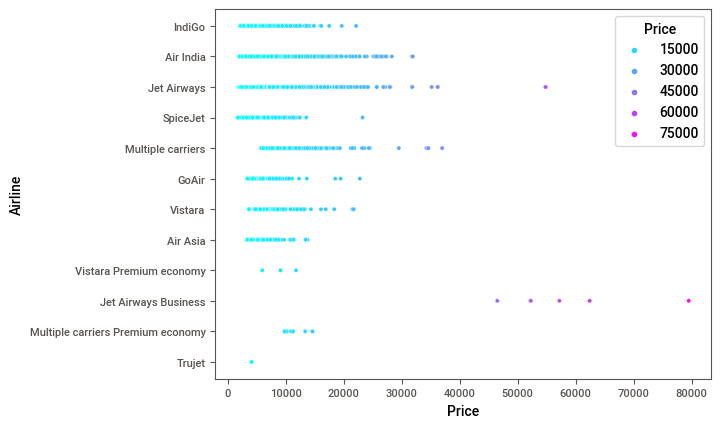

In [344]:
sns.scatterplot(x='Price',y='Airline',data=data,hue='Price',palette='cool')

- Jet Airways Business Flight Fare Is Very High compare To Other Airways
- Trujet Flight Fare Is very low Compare To Other Airways

<Axes: xlabel='Price', ylabel='Additional_Info'>

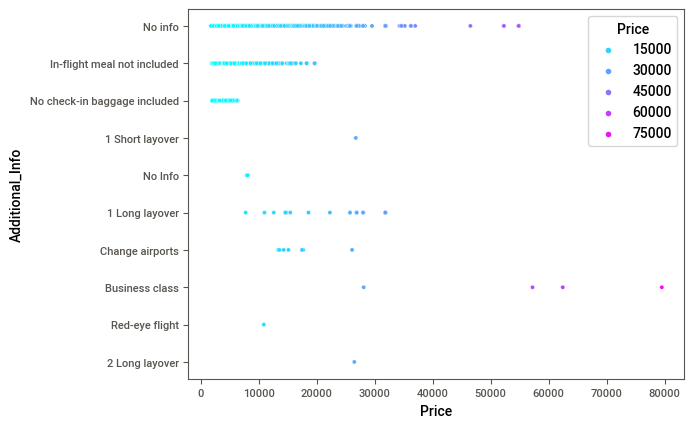

In [345]:
sns.scatterplot(x='Price',y='Additional_Info',data=data,hue='Price',palette='cool')

- Business class Flight Fare is very high
- No check-in baggage included Flight Fere Is Very Low 

## MULTIVARIATE

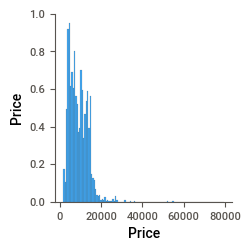

In [346]:
sns.pairplot(data)

# DATA PREPROCESSING

In [347]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


- average price of ticket is 9087.06
- minimum price for ticket 1759
- maximum price of ticket 79512
- standard deviation from mean 4611.35

## CHECKING DUPLICATE VALUES

In [348]:
# Total duplicated value is 220
data.duplicated().sum()

220

- The Given Dataset As 220 Duplicated Values

In [349]:
# count of duplicated value & non duplicated value
data.duplicated().value_counts()

False    10463
True       220
dtype: int64

In [350]:
# location of duplicate value
data.loc[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [351]:
# drop duplicate value
data.drop_duplicates(inplace=True)

## HANDLING MISSING VALUES

In [352]:
# one missing value in Total_stop
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- They Have Only one null value in route & total_stops

In [353]:
# location of missing value in 'Route' feature
data.loc[data['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [354]:
#location of missing value in 'Totel_Stops'
data.loc[data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


- Both Missing Values Are Same Record

In [355]:
# Droping Missing Value
data.dropna(inplace=True)

- They Have Only One Value Because Drop The Missing Values

## DATA TYPE CONVERTION

In [356]:
# converting hours & minute into minute by using str.replace function
data['Duration']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [357]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897


In [358]:
# spliting date of journey to date in seprate column using to_datetime function
data['Day_of_Journey']=pd.to_datetime(data['Date_of_Journey']).dt.day

In [359]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24


In [360]:
# spliting month of journey to month in seprate column using to_datetime function
data['Month_of_Journey']=pd.to_datetime(data['Date_of_Journey']).dt.month

In [361]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3


In [362]:
# spliting date of journey to year in seprate column using to_datetime function

data['Year_of_Journey']=pd.to_datetime(data['Date_of_Journey']).dt.year

In [363]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019


In [364]:
# spliting departure time (dep_Time) column into hour using to_datetime function
data["Dep_Hour"]=pd.to_datetime(data['Dep_Time']).dt.hour

In [365]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,22


In [366]:
# spliting departure time (dep_Time) column into minute using to_datetime function
data["Dep_Min"]=pd.to_datetime(data['Dep_Time']).dt.minute

In [367]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,22,20


In [368]:
# spliting arrival time (Arrival_Time) column into hour using to_datetime function
data["Arr_Hour"]=pd.to_datetime(data['Arrival_Time']).dt.hour

In [369]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,22,20,1


In [370]:
# spliting arrival time (Arrival_Time) column into minute using to_datetime function
data["Arr_Min"]=pd.to_datetime(data['Arrival_Time']).dt.minute

In [371]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,22,20,1,10


## ENCODING 

In [372]:
# Checking Unique Values 'Airline'
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [373]:
#converting categorical column (Airline) into numerical using map function (Mannual encoding)
data.Airline=data.Airline.map({'IndiGo':0,'Air India':1,'Jet Airways':2,'Jet Airways':3,'SpiceJet':4,'Multiple carriers':5,
                                     'GoAir':6,'Vistara':7,'Air Asia':8,'Vistara Premium economy':9,'Jet Airways Business':10,
                                     'Multiple carriers Premium economy':11,'Trujet':12})

In [374]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,22,20,1,10


In [375]:
# Checking Unique Values 'Source'
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [376]:
#converting categorical column (Source) into numerical using map function (Mannual encoding)
data.Source=data.Source.map({'Banglore':0, 'Kolkata':1, 'Delhi':2, 'Chennai':3, 'Mumbai':4})

In [377]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0,24/03/2019,0,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,22,20,1,10


In [378]:
# Checking Unique Values 'Destination'
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [379]:
#converting categorical column (Destination) into numerical using map function (Mannual encoding)

data["Destination"]=data["Destination"].map({'Banglore':0, 'Kolkata':1, 'Delhi':2, 'Chennai':3,'New Delhi':2,'Cochin':4,'Hyderabad':5})

In [380]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0,24/03/2019,0,2,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,22,20,1,10


In [381]:
# Checking Unique Values 'Totel_Stops'
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [382]:
#converting categorical column (Total_stop) into numerical using map function (Mannual encoding)
data['Total_Stops']=data['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3,'4 stops':4})

In [383]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0,24/03/2019,0,2,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,24,3,2019,22,20,1,10


In [384]:
# Checking Unique Values 'Additional_Info'
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [385]:
# unique value in 'Additional_Info'
data.Additional_Info.value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [386]:
#converting categorical column (Additional_info) into numerical using map function (Mannual encoding)
data['Additional_Info']=data['Additional_Info'].map({'No info':0, 'In-flight meal not included':1, 'No check-in baggage included':2, 
                                                    '1 Long layover':3, 'Change airports':4, 'Business class':5, 'No Info':6,
                                                    '1 Short layover':7, 'Red-eye flight':8, '2 Long layover':9})

In [387]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0,24/03/2019,0,2,BLR → DEL,22:20,01:10 22 Mar,170,0,0,3897,24,3,2019,22,20,1,10


In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  int64 
 1   Date_of_Journey   10462 non-null  object
 2   Source            10462 non-null  int64 
 3   Destination       10462 non-null  int64 
 4   Route             10462 non-null  object
 5   Dep_Time          10462 non-null  object
 6   Arrival_Time      10462 non-null  object
 7   Duration          10462 non-null  int64 
 8   Total_Stops       10462 non-null  int64 
 9   Additional_Info   10462 non-null  int64 
 10  Price             10462 non-null  int64 
 11  Day_of_Journey    10462 non-null  int64 
 12  Month_of_Journey  10462 non-null  int64 
 13  Year_of_Journey   10462 non-null  int64 
 14  Dep_Hour          10462 non-null  int64 
 15  Dep_Min           10462 non-null  int64 
 16  Arr_Hour          10462 non-null  int64 
 17  Arr_Min     

In [389]:
#drop the column since we have splitted date & time in seprate column
data.drop(['Dep_Time','Arrival_Time','Date_of_Journey'],axis=1,inplace=True)

In [390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  int64 
 1   Source            10462 non-null  int64 
 2   Destination       10462 non-null  int64 
 3   Route             10462 non-null  object
 4   Duration          10462 non-null  int64 
 5   Total_Stops       10462 non-null  int64 
 6   Additional_Info   10462 non-null  int64 
 7   Price             10462 non-null  int64 
 8   Day_of_Journey    10462 non-null  int64 
 9   Month_of_Journey  10462 non-null  int64 
 10  Year_of_Journey   10462 non-null  int64 
 11  Dep_Hour          10462 non-null  int64 
 12  Dep_Min           10462 non-null  int64 
 13  Arr_Hour          10462 non-null  int64 
 14  Arr_Min           10462 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 1.3+ MB


## USING LABEL ENCODER IN "Route" COLUMNS(FEATURE)

In [391]:
# Using Labelencoderv in "Route" Feature
from sklearn.preprocessing import LabelEncoder
LABEL_ENCODER=LabelEncoder()
data['Route']=LabelEncoder().fit_transform(data['Route'])

In [392]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0,0,2,18,170,0,0,3897,24,3,2019,22,20,1,10
1,1,1,0,84,445,2,0,7662,5,1,2019,5,50,13,15
2,3,2,4,118,1140,2,0,13882,6,9,2019,9,25,4,25
3,0,1,0,91,325,1,0,6218,5,12,2019,18,5,23,30
4,0,0,2,29,285,1,0,13302,3,1,2019,16,50,21,35


## OUTLIER HANDLING

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10462 non-null  int64
 1   Source            10462 non-null  int64
 2   Destination       10462 non-null  int64
 3   Route             10462 non-null  int32
 4   Duration          10462 non-null  int64
 5   Total_Stops       10462 non-null  int64
 6   Additional_Info   10462 non-null  int64
 7   Price             10462 non-null  int64
 8   Day_of_Journey    10462 non-null  int64
 9   Month_of_Journey  10462 non-null  int64
 10  Year_of_Journey   10462 non-null  int64
 11  Dep_Hour          10462 non-null  int64
 12  Dep_Min           10462 non-null  int64
 13  Arr_Hour          10462 non-null  int64
 14  Arr_Min           10462 non-null  int64
dtypes: int32(1), int64(14)
memory usage: 1.2 MB


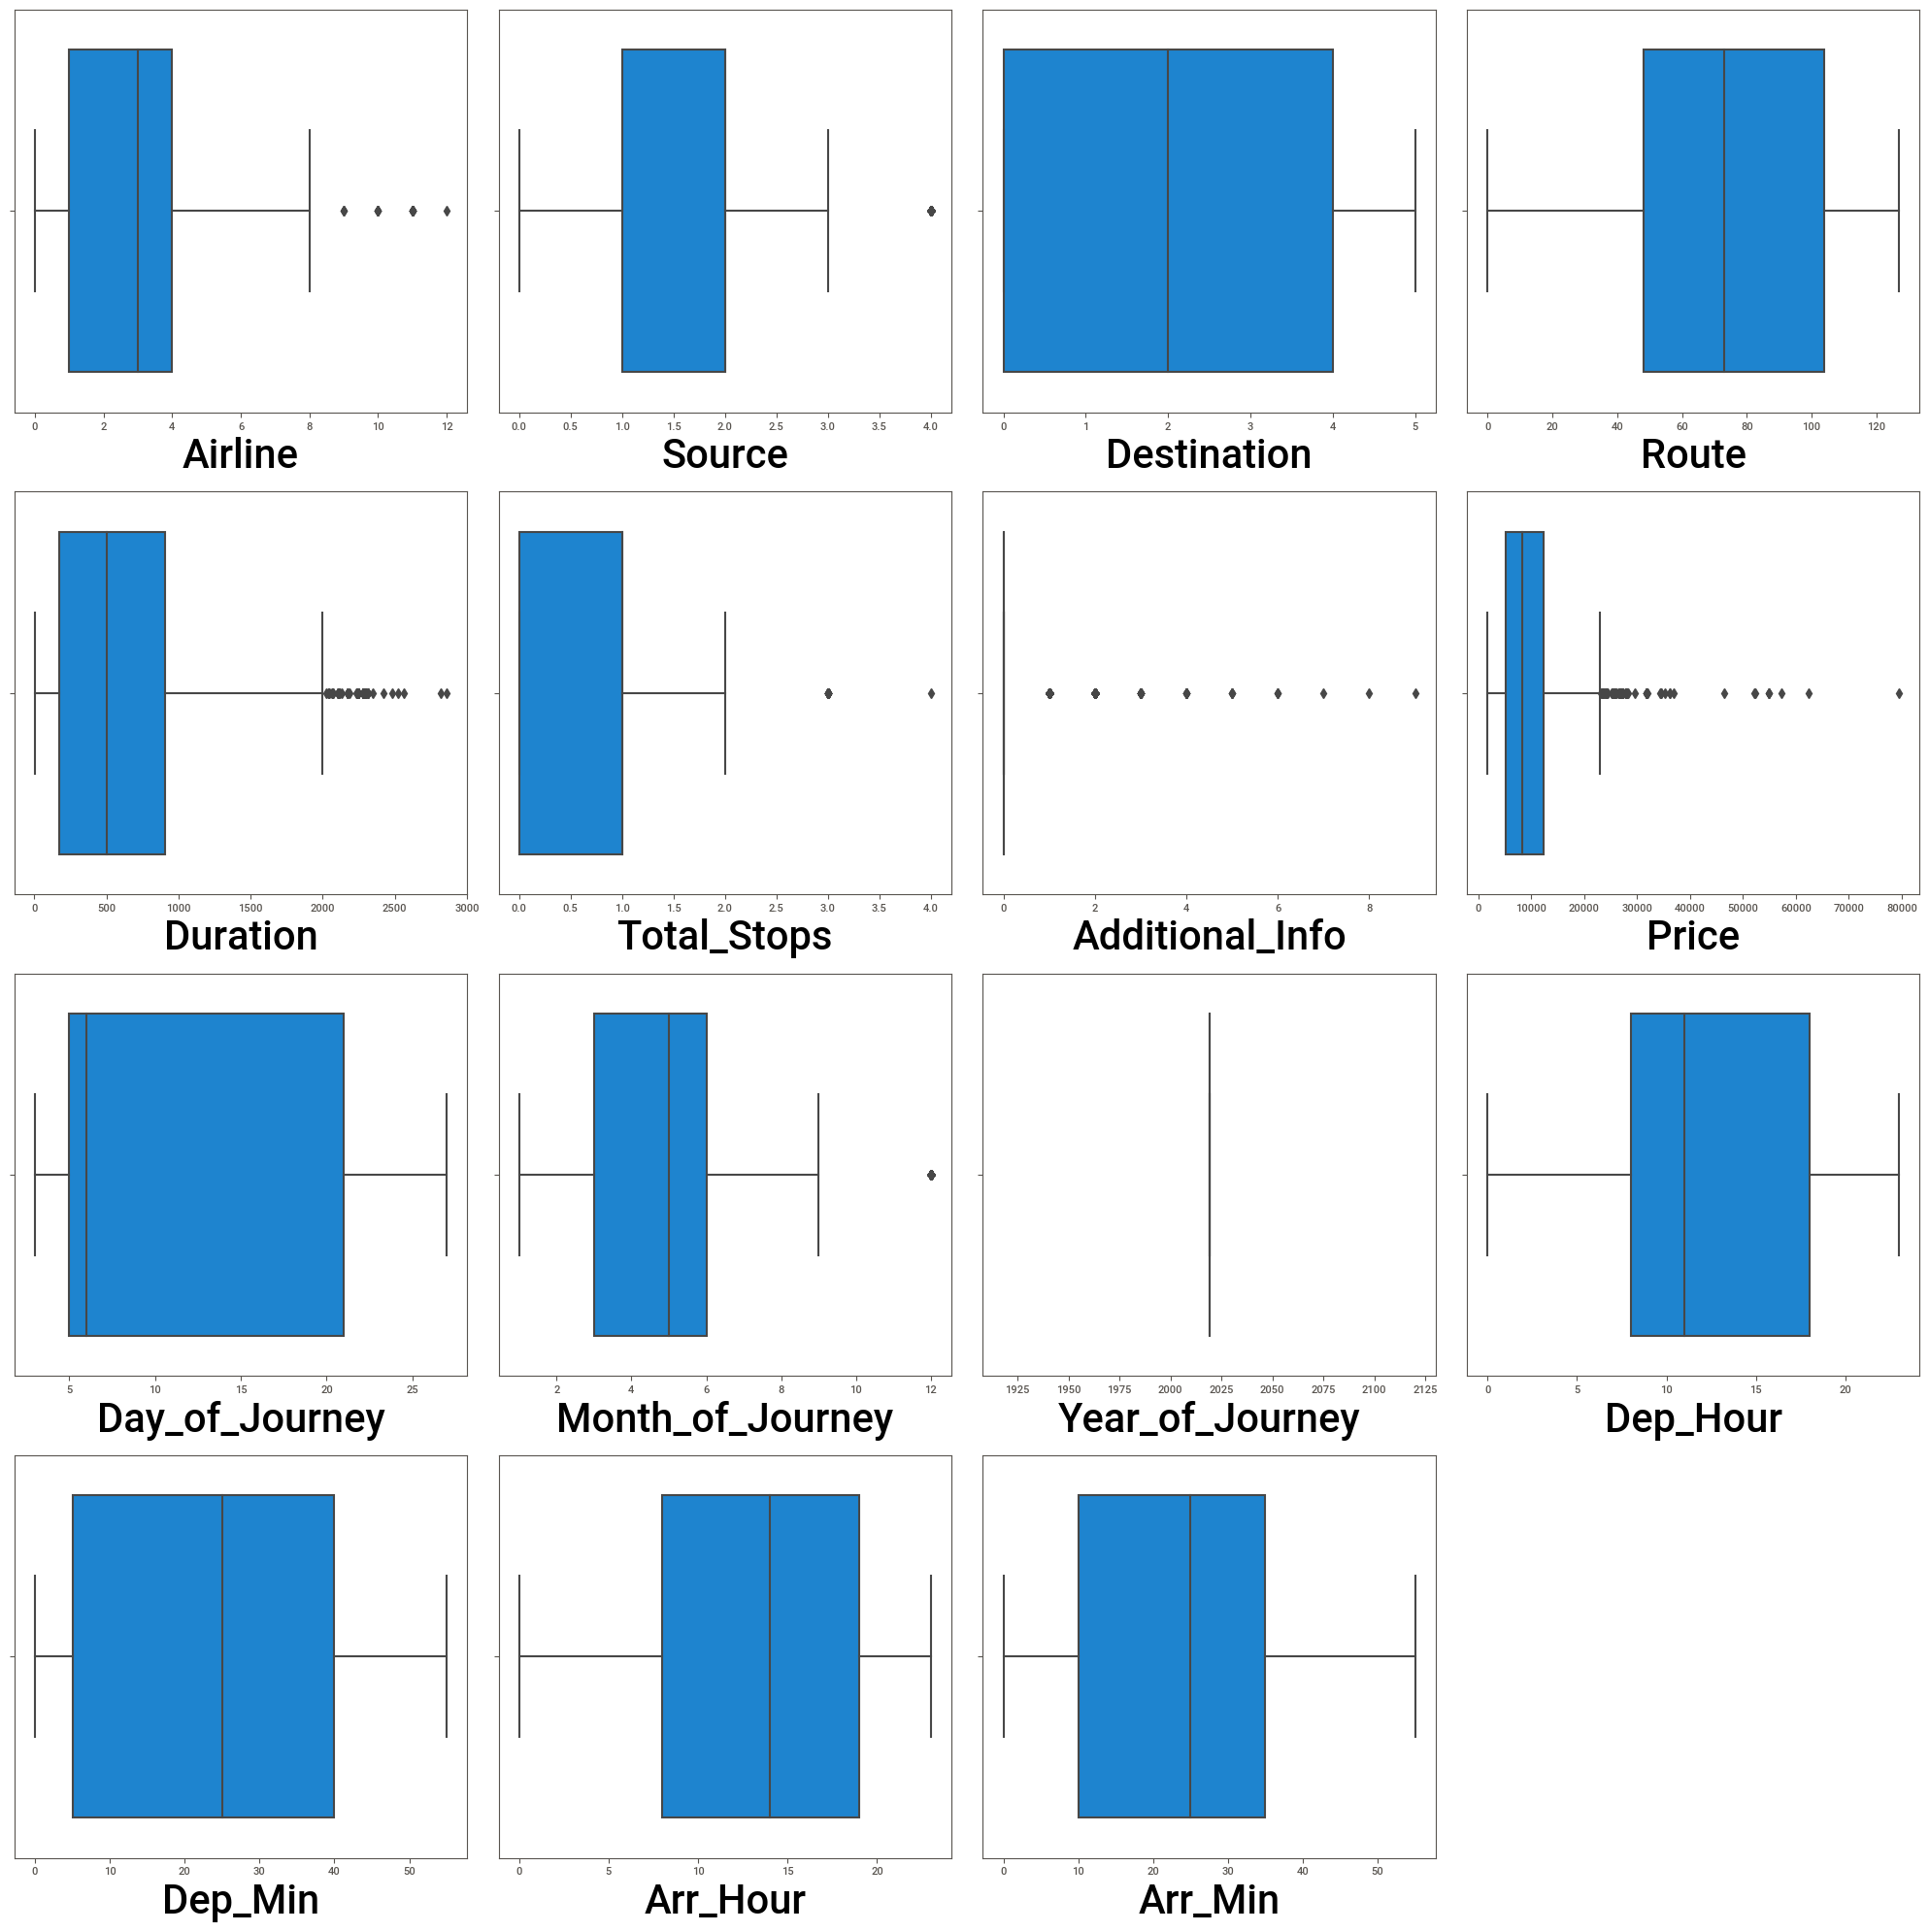

In [394]:
# Checking Outlier in Given Dataset Using Boxplot applying For Loop Condition
plt.figure(figsize=(20,20))
plotnumber=1

for i in data:
    if plotnumber < 17:
        plot=plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data[i])
        plt.xlabel(i,fontsize=30)
    plotnumber+=1
plt.tight_layout()

### Airline

<Axes: xlabel='Airline'>

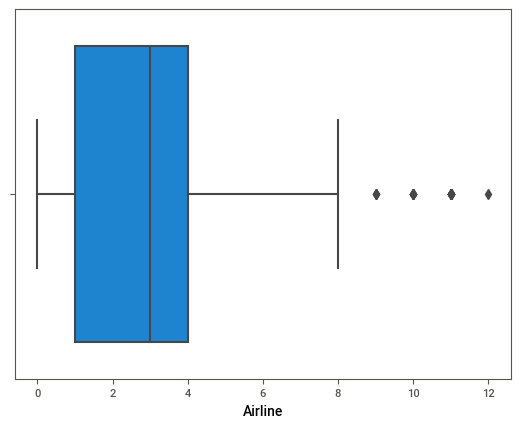

In [395]:
 # outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x='Airline',data=data)

<Axes: xlabel='Airline', ylabel='Count'>

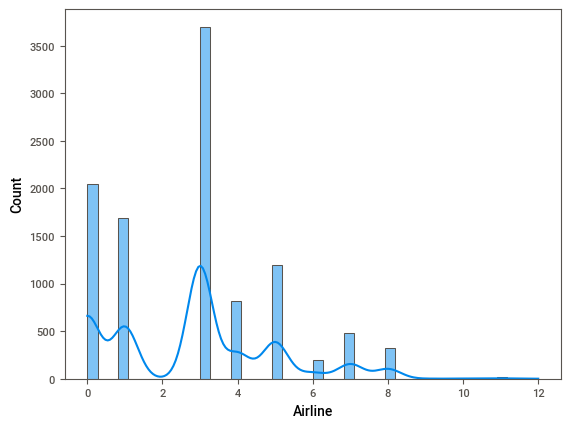

In [396]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x='Airline',data=data,kde=True)

In [397]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Airline,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Airline.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Airline.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  3.0
Q1 :  1.0
Q3 :  4.0
Lower_Limit :  -3.5
Upper_Limit :  8.5


In [398]:
# no outlier present in lower limit
data.loc[data['Airline']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [399]:
# outlier present in upper limit
data.loc[data['Airline']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
426,9,0,2,18,155,0,0,11793,3,3,2019,16,0,18,35
657,10,0,2,5,300,1,0,52229,3,1,2019,5,45,10,45
717,11,2,4,104,705,1,0,10161,21,3,2019,7,30,19,15
1799,11,2,4,104,810,1,0,9845,21,3,2019,7,30,21,0
2878,12,4,5,55,195,1,0,4140,3,6,2019,13,5,16,20
2924,10,0,2,5,340,1,5,79512,3,1,2019,5,45,11,25
4627,11,2,4,104,620,1,0,10161,21,3,2019,8,55,19,15
4718,11,2,4,104,900,1,0,9845,21,3,2019,6,0,21,0
5090,11,2,4,104,440,1,0,11269,21,3,2019,6,0,13,20
5372,10,0,2,5,400,1,5,62427,3,1,2019,5,45,12,25


In [400]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['Airline']>Upper_Limit,'Airline']=data.Airline.median()

In [401]:
data.loc[data['Airline']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


### Source

<Axes: xlabel='Source'>

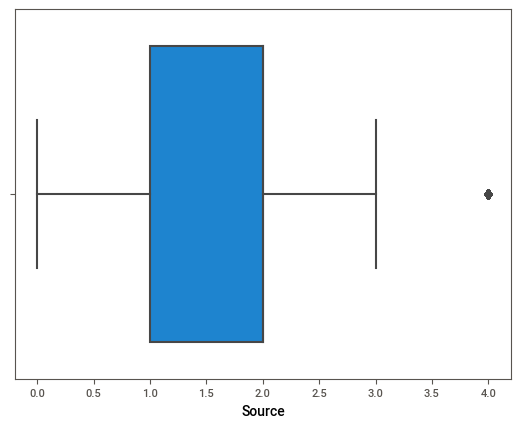

In [402]:
 # outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['Source'])

<Axes: xlabel='Source', ylabel='Count'>

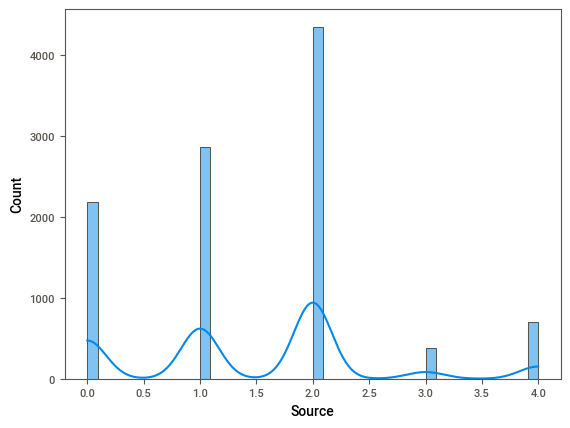

In [403]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['Source'],kde=True)

In [404]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Source,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Source.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Source.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  1.0
Q1 :  1.0
Q3 :  2.0
Lower_Limit :  -0.5
Upper_Limit :  3.5


In [405]:
# no outlier present in lower limit
data.loc[data['Source']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [406]:
# outlier present in upper limit
data.loc[data['Source']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
59,7,4,5,45,1505,1,0,12395,3,6,2019,15,40,16,45
67,1,4,5,48,90,0,0,3625,5,6,2019,13,55,15,25
70,3,4,5,48,85,0,0,5678,6,1,2019,7,5,8,30
77,0,4,5,48,90,0,0,4049,4,3,2019,6,25,7,55
98,3,4,5,48,85,0,0,8040,18,6,2019,7,5,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611,3,4,5,48,85,0,1,4050,18,5,2019,7,5,8,30
10617,0,4,5,48,90,0,0,2754,27,5,2019,2,35,4,5
10655,3,4,5,48,85,0,0,5678,5,3,2019,2,55,4,20
10671,1,4,5,48,80,0,0,3100,6,6,2019,21,5,22,25


In [407]:
#more than 5% of outlier so ignored
(697/10463)*100

6.66156933957756

- 6.7% OUTLIERS

### Destination

<Axes: xlabel='Destination'>

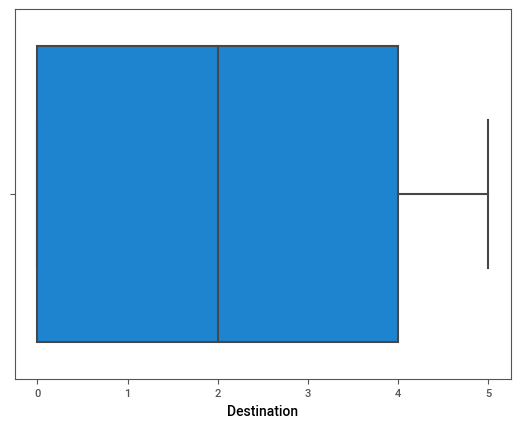

In [408]:
# no outlier present as per data visualization using boxplot
sns.boxplot(x=data['Destination'])

In [409]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Destination,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Destination.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Destination.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  4.0
Q1 :  0.0
Q3 :  4.0
Lower_Limit :  -6.0
Upper_Limit :  10.0


In [410]:
# no outlier in lower limit
data.loc[data['Destination']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [411]:
# no outlier in upper limit
data.loc[data['Destination']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


- NO OUTLIERS IN "Destination" COLUMN(FEATURE)

### Route

<Axes: xlabel='Route'>

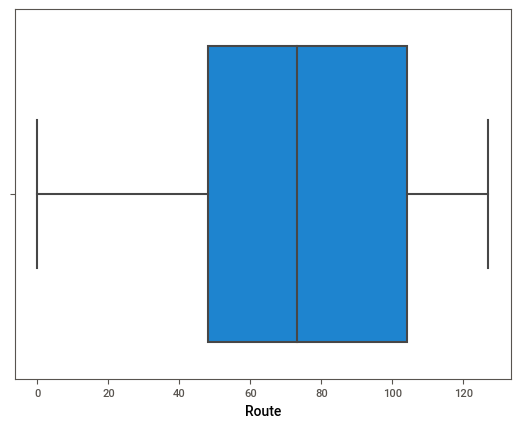

In [412]:
# no outlier present as per data visualization using boxplot
sns.boxplot(x=data['Route'])

In [413]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Route,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Route.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Route.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  56.0
Q1 :  48.0
Q3 :  104.0
Lower_Limit :  -36.0
Upper_Limit :  188.0


In [414]:
# no outlier present in lower limit
data.loc[data['Route']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [415]:
# no outlier present in upper limit
data.loc[data['Route']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


- NO OUTLIERS IN "Route" COLUMN(FEATURE)

### Duration

<Axes: xlabel='Duration'>

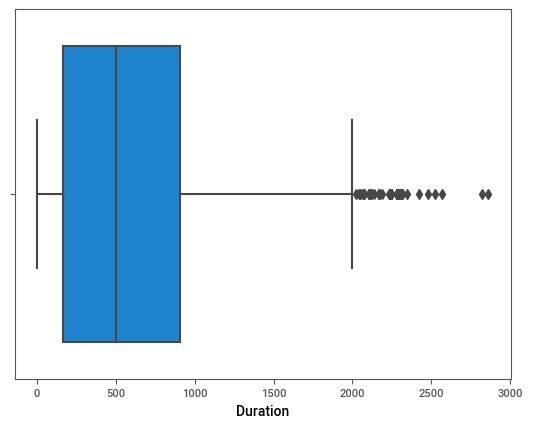

In [416]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['Duration'])

<Axes: xlabel='Duration', ylabel='Count'>

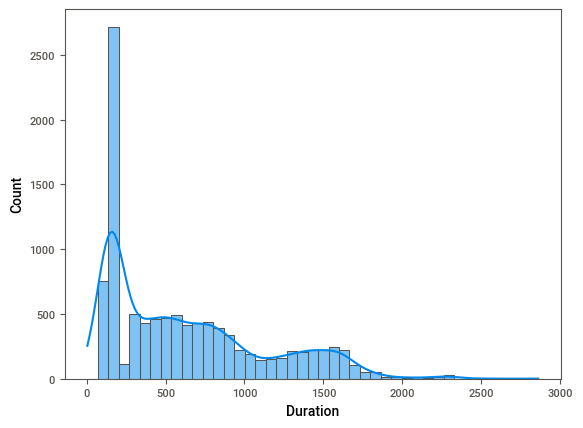

In [417]:
# distribution is not normally distributed & right skewed
sns.histplot(x=data['Duration'],kde=True)

In [418]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Duration,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Duration.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Duration.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  740.0
Q1 :  170.0
Q3 :  910.0
Lower_Limit :  -940.0
Upper_Limit :  2020.0


In [419]:
#no outlier present in lower limit
data.loc[data['Duration']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [420]:
# outlier present in upper limit
data.loc[data['Duration']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
226,3,2,4,113,2245,2,0,18799,3,3,2019,5,25,18,50
470,3,2,4,126,2045,2,0,13082,21,3,2019,18,20,4,25
553,1,2,4,97,2295,2,0,10598,3,9,2019,5,0,19,15
919,1,1,0,63,2115,3,0,10991,5,12,2019,12,0,23,15
925,3,2,4,107,2135,2,0,19907,3,6,2019,16,50,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,1,2,4,102,2240,2,0,13748,3,3,2019,5,55,19,15
10020,1,2,4,97,2295,2,0,9653,5,9,2019,5,0,19,15
10326,1,0,2,16,2420,2,0,11791,3,3,2019,5,50,22,10
10456,3,2,4,97,2860,2,0,20694,3,6,2019,19,10,18,50


In [421]:
#imputing the outlier in upper limit with median
data.loc[data['Duration']>Upper_Limit,'Duration']=data.Duration.median()

In [422]:
data.loc[data['Duration']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


### Total_Stops

<Axes: xlabel='Total_Stops'>

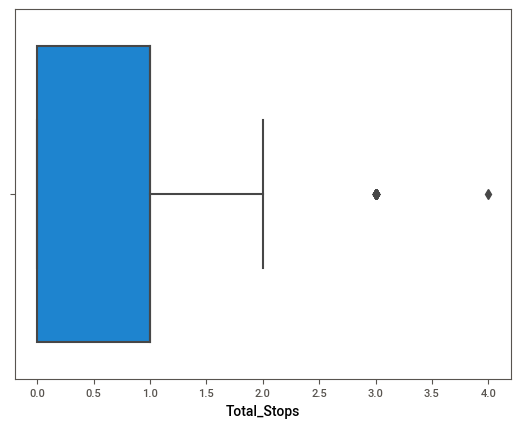

In [423]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['Total_Stops'])

<Axes: xlabel='Total_Stops', ylabel='Count'>

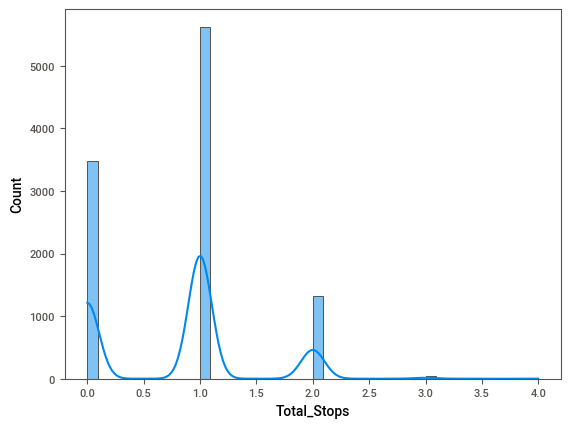

In [424]:
# distribution is not normally distributed
sns.histplot(x=data['Total_Stops'],kde=True)

In [425]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Total_Stops,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Total_Stops.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Total_Stops.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_Limit :  -1.5
Upper_Limit :  2.5


In [426]:
# no outlier present in lower limit
data.loc[data['Total_Stops']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [427]:
# outlier present in upper limit
data.loc[data['Total_Stops']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
402,1,2,4,124,1585,3,0,10493,15,6,2019,5,15,7,40
919,1,1,0,63,505,3,0,10991,5,12,2019,12,0,23,15
1218,1,2,4,124,1585,3,0,11543,27,6,2019,5,15,7,40
1665,1,0,2,13,1825,3,0,12346,3,1,2019,5,50,12,15
2172,1,2,4,124,505,3,0,10703,18,5,2019,5,15,19,15
2623,1,4,5,52,1775,3,0,18293,3,12,2019,9,40,15,15
2633,5,2,4,109,565,3,0,21829,3,6,2019,11,35,21,0
2718,1,2,4,124,505,3,0,15586,3,9,2019,5,15,19,15
2814,1,0,2,7,1480,3,0,13387,3,12,2019,17,25,18,5
2822,1,1,0,75,1470,3,0,13007,24,5,2019,10,0,10,30


In [428]:
#imputing outlier in upper limit with median
data.loc[data['Total_Stops']>Upper_Limit,'Total_Stops']=data.Total_Stops.median()

In [429]:

data.loc[data['Total_Stops']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


### Additional_Info

<Axes: xlabel='Additional_Info'>

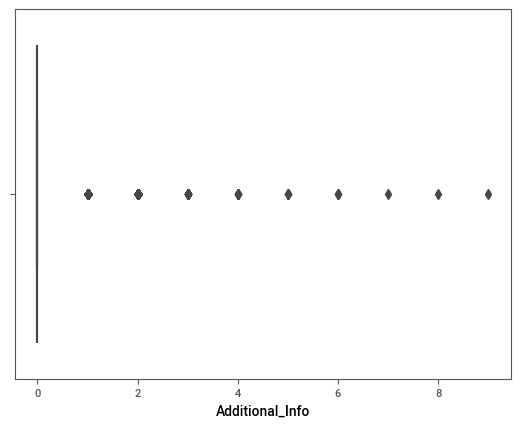

In [430]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['Additional_Info'])

In [431]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Additional_Info,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Additional_Info.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Additional_Info.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_Limit :  0.0
Upper_Limit :  0.0


In [432]:
# outlier present in upper limit
data.loc[data['Additional_Info']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
6,3,0,2,5,930,1,1,11087,3,12,2019,18,55,10,25
8,3,0,2,5,1530,1,1,11087,3,12,2019,8,55,10,25
13,3,1,0,66,730,1,1,9663,5,9,2019,21,10,9,20
17,3,2,4,104,1355,1,1,10262,6,12,2019,14,0,12,35
19,3,2,4,104,1235,1,1,12898,27,5,2019,16,0,12,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,3,2,4,116,1025,2,1,11733,6,6,2019,19,30,12,35
10666,3,2,4,104,1485,1,1,10262,6,12,2019,18,15,19,0
10667,3,0,2,5,1285,1,1,11087,3,12,2019,22,55,20,20
10674,3,0,2,5,1485,1,1,11087,3,12,2019,20,35,21,20


In [433]:
#more than 5% of outlier so ignored
(2280/10463)*100

21.7910733059352

- 21.8% OUTLIERS

### Day_of_Journey

<Axes: xlabel='Day_of_Journey'>

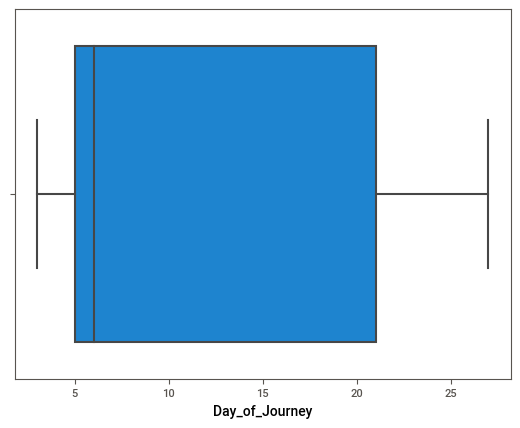

In [434]:
#no outlier present as per data visualization using boxplot
sns.boxplot(x=data['Day_of_Journey'])

In [435]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Day_of_Journey,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Day_of_Journey.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Day_of_Journey.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  16.0
Q1 :  5.0
Q3 :  21.0
Lower_Limit :  -19.0
Upper_Limit :  45.0


In [436]:
# no outlier present in lower limit
data.loc[data['Day_of_Journey']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [437]:
# no outlier present in upper limit
data.loc[data['Day_of_Journey']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


- NO OUTLIERS IN "Day_of_Journey" COLUMN(FEATURE)

### Month_of_Journey

<Axes: xlabel='Month_of_Journey'>

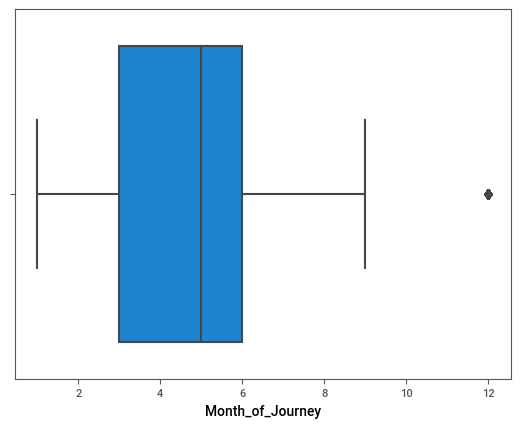

In [438]:
# outlier present on upper limit as per data visualization using boxplot
sns.boxplot(x=data['Month_of_Journey'])

In [439]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Month_of_Journey,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Month_of_Journey.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Month_of_Journey.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  3.0
Q1 :  3.0
Q3 :  6.0
Lower_Limit :  -1.5
Upper_Limit :  10.5


In [440]:
# no outlier present in lower limit
data.loc[data['Month_of_Journey']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [441]:
#outlier present in upper limit
data.loc[data['Month_of_Journey']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
3,0,1,0,91,325,1,0,6218,5,12,2019,18,5,23,30
6,3,0,2,5,930,1,1,11087,3,12,2019,18,55,10,25
8,3,0,2,5,1530,1,1,11087,3,12,2019,8,55,10,25
17,3,2,4,104,1355,1,1,10262,6,12,2019,14,0,12,35
18,1,2,4,105,1380,2,0,13381,6,12,2019,20,15,19,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10654,4,0,2,18,160,0,2,4319,6,12,2019,5,55,8,35
10666,3,2,4,104,1485,1,1,10262,6,12,2019,18,15,19,0
10667,3,0,2,5,1285,1,1,11087,3,12,2019,22,55,20,20
10670,1,1,0,85,1045,2,0,11411,5,12,2019,5,50,23,15


In [442]:
#more than 5% of outlier so ignored
(946/10463)*100

9.041383924304693

- 9.04% OUTLIERS

### Dep_Hour

<Axes: xlabel='Dep_Hour'>

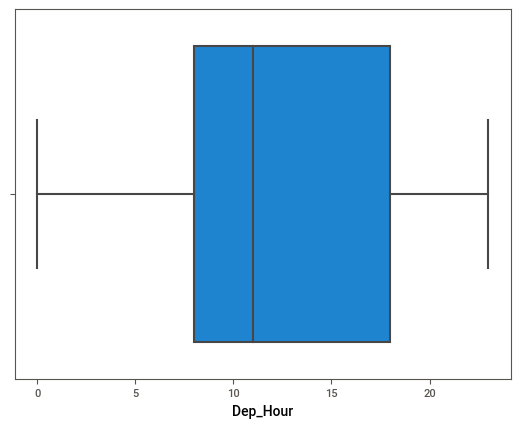

In [443]:
#no outlier present as per data visualization using boxplot
sns.boxplot(x=data['Dep_Hour'])

In [444]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Dep_Hour,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Dep_Hour.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Dep_Hour.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  10.0
Q1 :  8.0
Q3 :  18.0
Lower_Limit :  -7.0
Upper_Limit :  33.0


In [445]:
#no outlier present in lower limit
data.loc[data['Dep_Hour']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [446]:
#no outlier present in upper limit
data.loc[data['Dep_Hour']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


- NO OUTLIERS IN "Dep_Hour" COLUMN(FEATURE)

### Dep_Min

<Axes: xlabel='Dep_Min'>

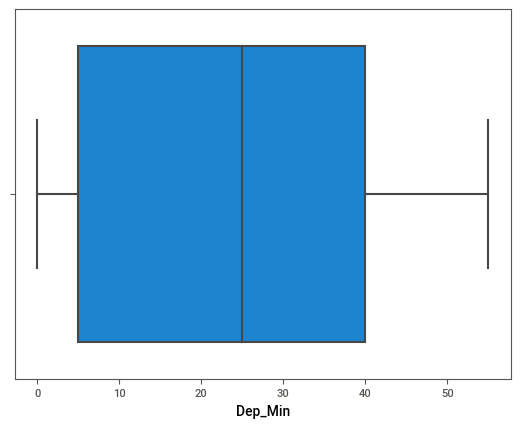

In [447]:
#no outlier present as per data visualization using boxplot
sns.boxplot(x=data['Dep_Min'])

In [448]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Dep_Min,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Dep_Min.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Dep_Min.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  35.0
Q1 :  5.0
Q3 :  40.0
Lower_Limit :  -47.5
Upper_Limit :  92.5


In [449]:
#no outlier present in lower limit
data.loc[data['Dep_Min']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [450]:
#no outlier present in lower limit
data.loc[data['Dep_Min']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


- NO OUTLIERS IN "Dep_Min" COLUMN(FEATURE)

### Arr_Hour

<Axes: xlabel='Arr_Hour'>

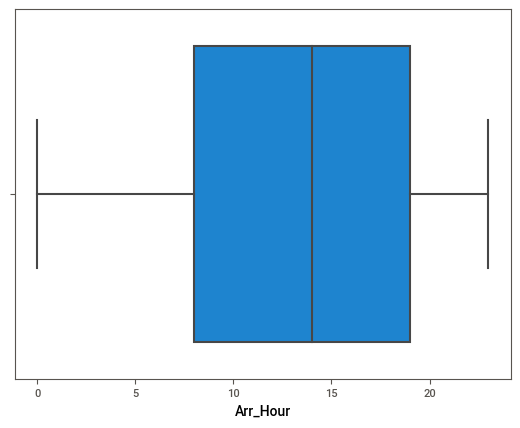

In [451]:
#no outlier present as per data visualization using boxplot
sns.boxplot(x=data['Arr_Hour'])

In [452]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Arr_Hour,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Arr_Hour.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Arr_Hour.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  11.0
Q1 :  8.0
Q3 :  19.0
Lower_Limit :  -8.5
Upper_Limit :  35.5


In [453]:
#no outlier present in lower limit
data.loc[data['Arr_Hour']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [454]:
#no outlier present in lower limit
data.loc[data['Arr_Hour']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


- NO OUTLIERS IN "Arr_Hours" COLUMN(FEATURE)

### Arr_Min

<Axes: xlabel='Arr_Min'>

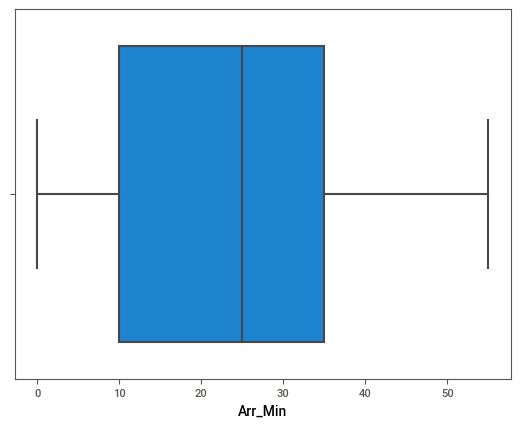

In [455]:
#no outlier present as per data visualization using boxplot
sns.boxplot(x=data['Arr_Min'])

In [456]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data.Arr_Min,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.Arr_Min.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.Arr_Min.quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  25.0
Q1 :  10.0
Q3 :  35.0
Lower_Limit :  -27.5
Upper_Limit :  72.5


In [457]:
#no outlier present in lower limit
data.loc[data['Arr_Min']<Lower_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


In [458]:
#no outlier present in lower limit
data.loc[data['Arr_Min']>Upper_Limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min


- NO OUTLIERS IN "Arr_Min" COLUMN(FEATURE)

In [459]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0,0,2,18,170,0,0,3897,24,3,2019,22,20,1,10
1,1,1,0,84,445,2,0,7662,5,1,2019,5,50,13,15
2,3,2,4,118,1140,2,0,13882,6,9,2019,9,25,4,25
3,0,1,0,91,325,1,0,6218,5,12,2019,18,5,23,30
4,0,0,2,29,285,1,0,13302,3,1,2019,16,50,21,35


# FEATURE SELECTION

In [460]:
# Checking Statstical Information
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Airline,10462.0,2.787708,2.134461,0.0,1.0,3.0,4.00,8.0
Source,10462.0,1.479736,1.067155,0.0,1.0,2.0,2.00,4.0
Destination,10462.0,2.447333,1.786322,0.0,0.0,2.0,4.00,5.0
Route,10462.0,74.286465,36.707488,0.0,48.0,73.0,104.00,127.0
Duration,10462.0,617.219939,481.166071,5.0,170.0,505.0,895.00,2000.0
Total_Stops,10462.0,0.793825,0.644722,0.0,0.0,1.0,1.00,2.0
Additional_Info,10462.0,0.258937,0.551483,0.0,0.0,0.0,0.00,9.0
Price,10462.0,9026.790289,4624.849541,1759.0,5224.0,8266.0,12344.75,79512.0
Day_of_Journey,10462.0,12.630090,8.791635,3.0,5.0,6.0,21.00,27.0
Month_of_Journey,10462.0,5.534601,2.995344,1.0,3.0,5.0,6.00,12.0


In [461]:
# Droping The 'Year_of_Journey'
data.drop('Year_of_Journey',axis=1,inplace=True)

- Droping The 'Year_of_Journey' Feature Because STD(stander Diviation)=0

- STANDERD DEVIATION IS "0" BECAUSE DROP THE FEATURE "Year_of_Journey"

In [462]:
data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0,0,2,18,170,0,0,3897,24,3,22,20,1,10


In [463]:
# finding correlation statistical value
data.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
Airline,1.000000,-0.048326,-0.003773,0.015196,0.015749,-0.011317,0.102982,0.094759,0.022044,0.013013,-0.001363,0.050076,0.037022,-0.013087
Source,-0.048326,1.000000,0.599542,0.618692,-0.011033,0.093616,-0.030310,-0.060080,0.068190,0.009595,-0.072253,-0.019656,-0.019885,-0.085301
Destination,-0.003773,0.599542,1.000000,0.343757,-0.011464,0.154460,-0.062669,0.059271,0.085784,-0.034873,-0.154783,-0.027987,-0.041117,-0.137267
Route,0.015196,0.618692,0.343757,1.000000,0.269058,0.448457,-0.074766,0.154374,0.094510,0.039996,-0.075188,-0.070978,0.021612,-0.174172
Duration,0.015749,-0.011033,-0.011464,0.269058,1.000000,0.710392,0.045649,0.501552,-0.046379,0.063934,0.023508,-0.018542,0.048706,-0.072984
Total_Stops,-0.011317,0.093616,0.154460,0.448457,0.710392,1.000000,-0.034810,0.604341,-0.032413,0.065149,-0.059774,-0.002825,0.048170,-0.106159
Additional_Info,0.102982,-0.030310,-0.062669,-0.074766,0.045649,-0.034810,1.000000,-0.016480,0.023129,-0.027733,0.034889,0.051883,-0.060739,-0.034482
Price,0.094759,-0.060080,0.059271,0.154374,0.501552,0.604341,-0.016480,1.000000,-0.171142,0.008662,0.005155,-0.024155,0.031023,-0.086163
Day_of_Journey,0.022044,0.068190,0.085784,0.094510,-0.046379,-0.032413,0.023129,-0.171142,1.000000,-0.265200,-0.007617,-0.013512,-0.001133,-0.019622
Month_of_Journey,0.013013,0.009595,-0.034873,0.039996,0.063934,0.065149,-0.027733,0.008662,-0.265200,1.000000,0.028462,0.001922,-0.003041,-0.023619


<Axes: >

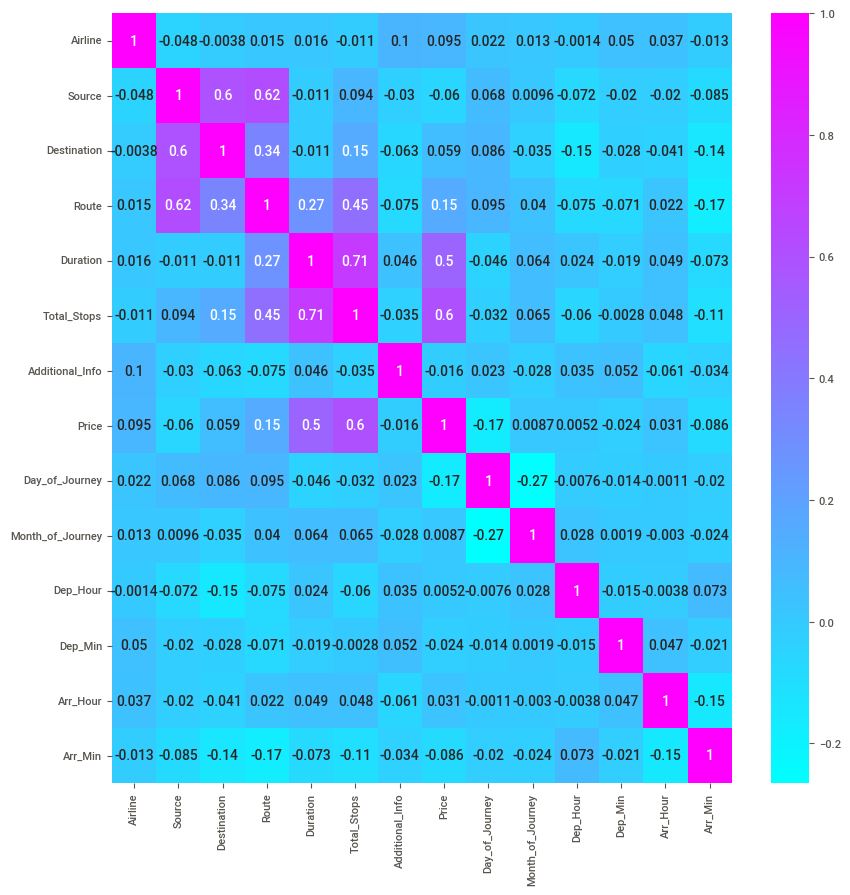

In [464]:
# finding correlation & visualization using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='cool',) # 'annot' is used display correlation value in heatmap and 'cmap' is used display colur function

- NO HIGHLY CO-RELATED VALUES

In [465]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min'],
      dtype='object')

## Task 2:-  Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

# MODEL CREATION

## SPLITTING DATA

In [466]:
# Spliting X,y Value
X=data.drop('Price',axis=True)

In [467]:
# price is the target variable
y=data.Price

In [468]:
# Shape of X value
X.shape

(10462, 13)

In [469]:
# Shape of y value
y.shape

(10462,)

In [470]:
# Spliting Train And test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [471]:
# Shape of X_train Data
X_train.shape

(7846, 13)

In [472]:
# Shape of X_test Data
X_test.shape

(2616, 13)

In [473]:
# Shape of y_train Data
y_train.shape

(7846,)

In [474]:
# Shape of y_test Data
y_test.shape

(2616,)

# LINEAR REGRESSION

In [475]:
from sklearn.linear_model import LinearRegression #importing Lenier regression from sklearn liberary
LR=LinearRegression()  #initialize the model
LR.fit(X_train,y_train) # Train model with x_train and y-train

LinearRegression()

In [476]:
y_pred_LR=LR.predict(X_test) #predict using x_test

In [477]:
y_train_pred_LR=LR.predict(X_train) #predict using x_train

## EVALUATION OF LINEAR REGRESSION

In [478]:
# importing accuracy function and error functions
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [479]:
#r2 score of train data
R2_train=r2_score(y_train,y_train_pred_LR)
R2_train

0.43158745719966396

In [480]:
# r2 Score of test data
R2_LR=r2_score(y_test,y_pred_LR)
R2_LR

0.434735717735223

- Model has learn 43% of the information
- Linear Regression is Genaralized model

In [481]:
#mean absolute error
MAE_LR=mean_absolute_error(y_test,y_pred_LR)
MAE_LR

2437.5479096716163

In [482]:
# mean square error
MSE_LR=mean_squared_error(y_test,y_pred_LR)
MSE_LR

12069113.938194688

In [483]:
#root mean square error
RMSE_LR=np.sqrt(MSE_LR)
RMSE_LR

3474.0630302564587

In [484]:
#adjusted R2 score
ADJUST_R2_LR=1-(1-R2_LR)*(2616-1)/(2616-13-1)
ADJUST_R2_LR

0.4319115687461984

# KNN REGRESSION

In [485]:
# Import KNN algorithm
from sklearn.neighbors import KNeighborsRegressor
# Create Empty List To Store Error Values
Error_rate=[]

for i in range(1,11):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Error_rate.append(np.mean(y_test!=y_pred))
Error_rate

[0.7847859327217125,
 0.9048165137614679,
 0.9510703363914373,
 0.9747706422018348,
 0.9824159021406728,
 0.9885321100917431,
 0.9923547400611621,
 0.9942660550458715,
 0.9954128440366973,
 0.9980886850152905]

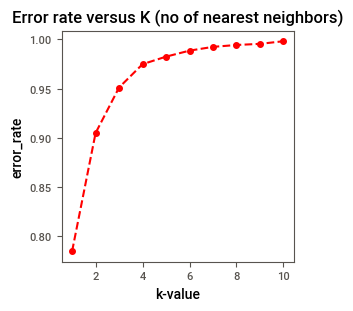

In [486]:
# Finding Best "K" Value in KNN Classifier
plt.figure(figsize=(3,3))
plt.plot(range(1,11),Error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [487]:
from sklearn.neighbors import KNeighborsRegressor # import KNN from sklearn
KNNR=KNeighborsRegressor(n_neighbors=5) #initialize the model
KNNR.fit(X_train,y_train) #train the model
y_pred_KNNR=KNNR.predict(X_test)#predict using x_test

In [488]:
y_train_pred_KNNR=KNNR.predict(X_train)#predict using X_train

# EVALUATION OF KNN REGRESSION

In [489]:
#r2 score of train data
R2_train_KNNR=r2_score(y_train,y_train_pred_KNNR)
R2_train_KNNR

0.7106806395041556

In [490]:
#r2 score of test data
R2_KNNR=r2_score(y_test,y_pred_KNNR)
R2_KNNR

0.5801530083063395

- Model has learn 58% of the information
- KNN is Overfitting Model

In [491]:
# mean absolute error
MAE_KNNR=mean_absolute_error(y_test,y_pred_KNNR)
MAE_KNNR

1810.4727828746177

In [492]:
# mean square error
MSE_KNNR=mean_squared_error(y_test,y_pred_KNNR)
MSE_KNNR

8964269.171681957

In [493]:
#root mean square error
RMSE_KNNR=np.sqrt(MSE_KNNR)
RMSE_KNNR

2994.0389395734246

In [494]:
#adjusted R2 score
ADJUST_R2_KNNR=1-(1-R2_KNNR)*(2616-1)/(2616-13-1)
ADJUST_R2_KNNR

0.5780553869027971

# SUPPORT VECTOR MACHINE (SVM) REGRESSION

In [495]:
from sklearn.svm import SVR # import SVR from sklearn
SVMR=SVR() #initialize the model

In [496]:
SVMR.fit(X_train,y_train) #train the model

SVR()

In [497]:
y_pred_SVMR=SVMR.predict(X_test) #predict using X_test

In [498]:
y_train_pred_SVMR=SVMR.predict(X_train) #predict using X_train

# EVALUATION OF SUPPORT VECTOR MACHINE (SVM) REGRESSION

In [499]:
#r2 score of train data
R2_train_SVMR=r2_score(y_train,y_train_pred_SVMR)
R2_train_SVMR

0.14111681996579717

In [500]:
#r2 score of test data
R2_SVMR=r2_score(y_test,y_pred_SVMR)
R2_SVMR

0.14885093140712158

- Model has learn 15% of the information
- SVM is genaralized Model

In [501]:
#mean absolute error
MAE_SVMR=mean_absolute_error(y_test,y_pred_SVMR)
MAE_SVMR

3095.2571734294706

In [502]:
# mean square error
MSE_SVMR=mean_squared_error(y_test,y_pred_SVMR)
MSE_SVMR

18173119.033945814

In [503]:
#root mean square error
RMSE_SVMR=np.sqrt(MSE_SVMR)
RMSE_SVMR

4262.9941395626865

In [504]:
#adjusted R2 score
ADJUST_R2_SVMR=1-(1-R2_SVMR)*(2616-1)/(2616-13-1)
ADJUST_R2_SVMR

0.1445984571981641

# SVR HYPERPARAMETER TUNING

In [190]:
from sklearn.model_selection import GridSearchCV # import GridSearchCV from sklearn
  
# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
model=SVR()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='r2',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................................C=0.1, gamma=1; total time=  16.6s
[CV] END .....................................C=0.1, gamma=1; total time=  18.0s
[CV] END .....................................C=0.1, gamma=1; total time=  19.9s
[CV] END .....................................C=0.1, gamma=1; total time=  16.0s
[CV] END .....................................C=0.1, gamma=1; total time=  15.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=  15.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=  15.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=  15.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=  15.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=  15.4s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.7s
[CV] END ..................................C=0.

[CV] END ......................................C=60, gamma=1; total time=  15.8s
[CV] END ......................................C=60, gamma=1; total time=  15.8s
[CV] END ......................................C=60, gamma=1; total time=  15.8s
[CV] END ......................................C=60, gamma=1; total time=  15.7s
[CV] END ....................................C=60, gamma=0.1; total time=  15.4s
[CV] END ....................................C=60, gamma=0.1; total time=  15.6s
[CV] END ....................................C=60, gamma=0.1; total time=  15.3s
[CV] END ....................................C=60, gamma=0.1; total time=  15.4s
[CV] END ....................................C=60, gamma=0.1; total time=  15.1s
[CV] END ...................................C=60, gamma=0.01; total time=  14.5s
[CV] END ...................................C=60, gamma=0.01; total time=  14.4s
[CV] END ...................................C=60, gamma=0.01; total time=  14.7s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='r2', verbose=2)

In [191]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 70, 'gamma': 0.0001}


In [505]:
#clf=SVC(C=70, gamma=0.0001) 
SVR=SVR(C=70, gamma=0.0001) #initialize the model

In [506]:
SVR.fit(X_train, y_train) #train the model

SVR(C=70, gamma=0.0001)

In [507]:
y_pred_SVMR_HYPER=SVR.predict(X_test) #predict using X_test

In [508]:
y_train_pred_SVMR_HYPER=SVR.predict(X_train) #predict using X_train

# EVALUATION OF SVR HYPERPARAMETER TUNING 

In [509]:
#r2 score of train data
R2_train_SVMR_HYPER=r2_score(y_train,y_train_pred_SVMR_HYPER)
R2_train_SVMR_HYPER

0.4323094800334635

In [510]:
#r2 score of test data
R2_SVMR_HYPER=r2_score(y_test,y_pred_SVMR_HYPER)
R2_SVMR_HYPER

0.44091013034530924

- Model has learn 44% of the information
- SVM Hyperparameter Tunning is Genaralized Model

In [511]:
#mean absolute error
MAE_SVMR_HYPER=mean_absolute_error(y_test,y_pred_SVMR)
MAE_SVMR_HYPER

3095.2571734294706

In [512]:
# mean square error
MSE_SVMR_HYPER=mean_squared_error(y_test,y_pred_SVMR)
MSE_SVMR_HYPER

18173119.033945814

In [513]:
#root mean square error
RMSE_SVMR_HYPER=np.sqrt(MSE_SVMR)
RMSE_SVMR_HYPER

4262.9941395626865

In [514]:
# adjusted r2 score
ADJUST_R2_SVMR_HYPER=1-(1-R2_SVMR_HYPER)*(2616-1)/(2616-13-1)
ADJUST_R2_SVMR_HYPER

0.43811682968984766

## SVR USING KERNEL FUNCTION

In [515]:
from sklearn.svm import SVR # import SVR from sklearn

In [516]:
SVM=SVR(kernel='rbf',C=70, gamma=0.0001) #initialize the model
SVM.fit(X_train,y_train) #train the model
y_pred_SVMK=SVM.predict(X_test) #predict using X_test

In [517]:
y_train_pred_SVMK=SVM.predict(X_train) #predict using X_train

In [518]:
#r2 score of train data
R2_train_SVMK=r2_score(y_train,y_train_pred_SVMK)
R2_train_SVMK

0.4323094800334635

In [519]:
#r2 score of test data
R2_SVMK=r2_score(y_test,y_pred_SVMK)
R2_SVMK

0.44091013034530924

- Model has learn 44% of the information
- SVM Kernel Function is Genaralized Model

In [520]:
#mean absolute error
MAE_SVMK=mean_absolute_error(y_test,y_pred_SVMK)
MAE_SVMK

2247.674751611488

In [521]:
# mean square error
MSE_SVMK=mean_squared_error(y_test,y_pred_SVMK)
MSE_SVMK

11937282.34785612

In [522]:
#root mean square error
RMSE_SVMK=np.sqrt(MSE_SVMK)
RMSE_SVMK

3455.0372426149215

In [523]:
#adjusted R2 score
ADJUST_R2_SVMK=1-(1-R2_SVMK)*(2616-1)/(2616-13-1)
ADJUST_R2_SVMK

0.43811682968984766

# DECISION TREE

In [524]:
from sklearn.tree import DecisionTreeRegressor #import Decision Tree Regressor from sklearn
DT=DecisionTreeRegressor() #initialize the model 

In [525]:
DT.fit(X_train,y_train) #train the model

DecisionTreeRegressor()

In [526]:
y_pred_DT=DT.predict(X_test) #predict using X_test

In [527]:
y_train_pred_DT=DT.predict(X_train) #predict using X_train

# EVALUATION OF DECISION TREE REGRESSION

In [528]:
#r2 score of train data
R2_train_DTR=r2_score(y_train,y_train_pred_DT)
R2_train_DTR

0.9965660321818065

In [529]:
#r2 score of test data
R2_DTR=r2_score(y_test,y_pred_DT)
R2_DTR

0.7587511122437574

- Model has learn 76% of the information
- Decision Tree is Overfitting Model

In [530]:
#mean absolute error
MAE_DTR=mean_absolute_error(y_test,y_pred_DT)
MAE_DTR

766.4659785932722

In [531]:
# mean square error
MSE_DTR=mean_squared_error(y_test,y_pred_DT)
MSE_DTR

5150971.687308868

In [532]:
#root mean square error
RMSE_DTR=np.sqrt(MSE_DTR)
RMSE_DTR

2269.5752217780464

In [533]:
#adjusted R2 score
ADJUST_R2_DTR=1-(1-R2_DTR)*(2616-1)/(2616-13-1)
ADJUST_R2_DTR

0.7575457949721082

# DECISION TREE USING HYPERPARAMETER TUNING

In [204]:
from sklearn.model_selection import GridSearchCV

In [227]:
#object creation for decision tree with random state 8
tree_reg = DecisionTreeRegressor(random_state=8)

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 13))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 13)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_cv = GridSearchCV(tree_reg, params, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1, cv=5)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters



Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best paramters: {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'})


In [228]:
tree_cv.best_params_

{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [229]:
tree_cv.best_score_#getting best score form cv

-4409490.068827036

In [534]:
dt1=DecisionTreeRegressor(max_depth=12,min_samples_leaf= 5,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [535]:
dt1.fit(X_train,y_train)#traing model with best parameter

DecisionTreeRegressor(max_depth=12, min_samples_leaf=5)

In [536]:
y_hat1=dt1.predict(X_test)#predicting test data
y_hat1

array([16697.46666667,  3957.92      ,  4447.31428571, ...,
       13766.55882353, 13735.1884058 ,  4225.        ])

In [537]:
y_train_hat1=dt1.predict(X_train) #predict using X_train

# EVALUATION OF DECISION TREE HYPERPARAMETER TUNING

In [538]:
#r2 score of train data
R2_train_DTR_HYPER=r2_score(y_train,y_train_hat1)
R2_train_DTR_HYPER

0.8891130838440838

In [539]:
#r2 score of test data
R2_DTR_HYPER=r2_score(y_test,y_hat1)
R2_DTR_HYPER

0.8296438114632013

- Model has learn 83% of the information
- Decision Tree Hyperparameter Tunning is Overfitting Model

In [540]:
#mean absolute error
MAE_DTR_HYPER=mean_absolute_error(y_test,y_hat1)
MAE_DTR_HYPER

912.4391814549398

In [541]:
# mean square error
MSE_DTR_HYPER=mean_squared_error(y_test,y_hat1)
MSE_DTR_HYPER

3637322.070464945

In [542]:
#root mean square error
RMSE_DTR_HYPER=np.sqrt(MSE_DTR_HYPER)
RMSE_DTR_HYPER

1907.1764654758472

In [543]:
#adjusted R2 score
ADJUST_R2_DTR_HYPER=1-(1-R2_DTR_HYPER)*(2616-1)/(2616-13-1)
ADJUST_R2_DTR_HYPER

0.8287926852330021

# RANDOM FOREST

In [544]:
from sklearn.ensemble import RandomForestRegressor #import Random Regressor from sklearn
RF=RandomForestRegressor() #initialize the model
RF.fit(X_train,y_train) #train the model

RandomForestRegressor()

In [545]:
y_pred_RF=RF.predict(X_test) #predict using X_test

In [546]:
y_train_pred_RF=RF.predict(X_train) #predict using X_train

# EVALUATION OF RANDOM FOREST REGRESSION

In [547]:
#r2 score of train data
R2_train_RF=r2_score(y_train,y_train_pred_RF)
R2_train_RF

0.9764257094773715

In [548]:
#r2 score of test data
R2_RF=r2_score(y_test,y_pred_RF)
R2_RF

0.8853990373437519

- Model has learn 89% of the information
- Random Forest is Overfitting Model

In [549]:
#mean absolute error
MAE_RF=mean_absolute_error(y_test,y_pred_RF)
MAE_RF

668.2982119921362

In [550]:
# mean square error
MSE_RF=mean_squared_error(y_test,y_pred_RF)
MSE_RF

2446876.8311053067

In [551]:
#root mean square error
RMSE_RF=np.sqrt(MSE_RF)
RMSE_RF

1564.2496063944868

In [552]:
#adjusted R2 score
ADJUST_R2_RF=1-(1-R2_RF)*(2616-1)/(2616-13-1)
ADJUST_R2_RF

0.8848264729646085

# RANDOM FOREST USING HYPERPARAMETER TUNING

In [187]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None) # ADDING A 12th VALUE OF NONE
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

RF_REG = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=RF_REG, scoring='r2',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds (typical values are 3, 5 or 10)
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters
 


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False})


In [188]:
rf_best_params

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [553]:
RF_REG_1 = RandomForestRegressor(n_estimators = 600,
 min_samples_split = 2,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 110,
 bootstrap = False) # passing best parameter to randomforest

RF_REG_1.fit(X_train, y_train)#training 
y_predict=RF_REG_1.predict(X_test)#testing

In [554]:
y_train_pred_RF_HYPER=RF_REG_1.predict(X_train) #predict using X_train

# EVALUATION OF RANDOM FOREST HYPERPARAMETER TUNING

In [555]:
#r2 score of train data
R2_train_RF_HYPER=r2_score(y_train,y_train_pred_RF_HYPER)
R2_train_RF_HYPER

0.9675568397068519

In [556]:
#r2 score of test data
R2_RF_HYPER=r2_score(y_test,y_predict)
R2_RF_HYPER

0.8877039509288123

- Model has learn 89% of the information
- Random Forest Hyperparameter Tunning is Overfitting Model

In [557]:
#mean absolute error
MAE_RF_HYPER=mean_absolute_error(y_test,y_predict)
MAE_RF_HYPER

764.5048635991191

In [558]:
# mean square error
MSE_RF_HYPER=mean_squared_error(y_test,y_predict)
MSE_RF_HYPER

2397663.9840378603

In [559]:
#root mean square error
RMSE_RF_HYPER=np.sqrt(MSE_RF_HYPER)
RMSE_RF_HYPER

1548.439209022382

In [560]:
#adjusted R2 score
ADJUST_R2_RF_HYPER=1-(1-R2_RF_HYPER)*(2616-1)/(2616-13-1)
ADJUST_R2_RF_HYPER

0.8871429022593559

# GRADIENT BOOSTING

In [561]:
X_train['Total_Stops']=X_train['Total_Stops'].astype('int64')
X_test['Total_Stops']=X_test['Total_Stops'].astype('int64')

In [562]:
from sklearn.ensemble import GradientBoostingRegressor #import Gradient Boosting Regressor from sklearn
GBR=GradientBoostingRegressor() #initialize the model
GBR.fit(X_train,y_train) #train the model

GradientBoostingRegressor()

In [563]:
y_pred_GBR=GBR.predict(X_test) #predict using X_test

In [564]:
y_train_pred_GBR=GBR.predict(X_train) #predict using X_train

# EVALUATION OF GRADIENT BOOSTING REGRESSION

In [565]:
#r2 score of train data
R2_train_GBR=r2_score(y_train,y_train_pred_GBR)
R2_train_GBR

0.8278162873878158

In [566]:
#r2 score of test data
R2_GB=r2_score(y_test,y_pred_GBR)
R2_GB

0.8293650772999586

- Model has learn 83% of the information
- Grediant Boosting is Genaralized Model Model

In [567]:
#mean absolute error
MAE_GB=mean_absolute_error(y_test,y_pred_GBR)
MAE_GB

1252.8895614381338

In [568]:
# mean square error
MSE_GB=mean_squared_error(y_test,y_pred_GBR)
MSE_GB

3643273.400630661

In [569]:
#root mean square error
RMSE_GB=np.sqrt(MSE_GB)
RMSE_GB

1908.736074115712

In [570]:
#adjusted R2 score
ADJUST_R2_GB=1-(1-R2_GB)*(2616-1)/(2616-13-1)
ADJUST_R2_GB

0.8285125584701736

# GRADIENT BOOSTING USING HYPERPARAMETER TUNING

In [266]:
from sklearn.model_selection import GridSearchCV #import gridsearchCV from sklearn
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Create the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (R2):", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
Best Score (R2): 0.871127872517955


In [571]:
GB_HYPER = GradientBoostingRegressor(n_estimators = 150,
 min_samples_split = 4,
 min_samples_leaf = 2,
 max_depth = 5,
 learning_rate = 0.2) # passing best parameter to randomforest

GB_HYPER.fit(X_train, y_train)#training 

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          min_samples_split=4, n_estimators=150)

In [572]:
y_pred_GB_HYPER=GB_HYPER.predict(X_test) #testing

In [573]:
y_train_pred_GBR_HYPER=GB_HYPER.predict(X_train) #predict using X_train

# EVALUATION OF GRADIENT BOOSTING HYPERPARAMETER 

In [574]:
#r2 score of train data
R2_train_GBR_HYPER=r2_score(y_train,y_train_pred_GBR_HYPER)
R2_train_GBR_HYPER

0.9606854339712525

In [575]:
#r2 score of test data
R2_GB_HYPER=r2_score(y_test,y_pred_GB_HYPER)
R2_GB_HYPER

0.8846471052533718

- Model has learn 88% of the information
- Grediant Boosting Huyperparameter Tunning is Overfitting Model Model

In [576]:
#mean absolute error
MAE_GB_HYPER=mean_absolute_error(y_test,y_pred_GB_HYPER)
MAE_GB_HYPER

828.5914131877811

In [577]:
# mean square error
MSE_GB_HYPER=mean_squared_error(y_test,y_pred_GB_HYPER)
MSE_GB_HYPER

2462931.5410123644

In [578]:
#root mean square error
RMSE_GB_HYPER=np.sqrt(MSE_GB_HYPER)
RMSE_GB_HYPER

1569.3729770237426

In [579]:
#adjusted R2 score
ADJUST_R2_GB_HYPER=1-(1-R2_GB_HYPER)*(2616-1)/(2616-13-1)
ADJUST_R2_GB_HYPER

0.8840707841036

# XG BOOSTING

In [580]:
from xgboost import XGBRegressor #import xgboosting from sklearn
XGB_R=XGBRegressor() #initialize the model
XGB_R.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [581]:
y_pred_XGBR=XGB_R.predict(X_test) #predict using X_test

In [582]:
y_train_XGBR=XGB_R.predict(X_train) #predict using X_train

# EVALUATION OF XG BOOSTING REGRESSION

In [583]:
#r2 score of train data
R2_train_XGBR=r2_score(y_train,y_train_XGBR)
R2_train_XGBR

0.9779138345593855

In [584]:
#r2 score of test data
R2_XGB=r2_score(y_test,y_pred_XGBR)
R2_XGB

0.877848789214204

- Model has learn 88% of the information
- Xtream Grediant Boosting is Overfitting Model Model

In [585]:
#mean absolute error
MAE_XGB=mean_absolute_error(y_test,y_pred_XGBR)
MAE_XGB

776.8822720028938

In [586]:
# mean square error
MSE_XGB=mean_squared_error(y_test,y_pred_XGBR)
MSE_XGB

2608084.2659215597

In [587]:
#root mean square error
RMSE_XGB=np.sqrt(MSE_XGB)
RMSE_XGB

1614.9564284901187

In [588]:
#adjusted R2 score
ADJUST_R2_XGB=1-(1-R2_XGB)*(2616-1)/(2616-13-1)
ADJUST_R2_XGB

0.8772385026115078

# XG BOOSTING USING HYPERPARAMETER

In [236]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB_HYPER=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB_HYPER, scoring='r2',param_distributions=param_grid, n_iter=100, cv=5, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'reg_lambda': 25.6, 'reg_alpha': 51.2, 'n_estimators': 130, 'max_depth': 8, 'learning_rate': 0.5, 'gamma': 0.8})


In [589]:
XGB_HYPER=XGBRegressor(reg_lambda= 25.6, reg_alpha= 51.2, n_estimators=130, max_depth=8, learning_rate=0.5, gamma=0.8) #initialize the model
XGB_HYPER.fit(X_train, y_train)#training 
y_pred_XGB_HYPER=XGB_HYPER.predict(X_test)#testing

In [590]:
y_train_pred_XGB_HYPER=XGB_HYPER.predict(X_train) #predict using X_train

# EVALUATION OF XG BOOSTING HYPERPARAMETER TUNING

In [591]:
#r2 score of train data
R2_train_XGB_HYPER=r2_score(y_train,y_train_pred_XGB_HYPER)
R2_train_XGB_HYPER

0.9848118847223115

In [592]:
#r2 score of test data
R2_XGB_HYPER=r2_score(y_test,y_pred_XGB_HYPER)
R2_XGB_HYPER

0.8826678941147204

- Model has learn 88% of the information
- XG Boosting Hyperparameter Tunning is Overfitting Model Model

In [593]:
#mean absolute error
MAE_XGB_HYPER=mean_absolute_error(y_test,y_pred_XGB_HYPER)
MAE_XGB_HYPER

748.9257056559992

In [594]:
# mean square error
MSE_XGB_HYPER=mean_squared_error(y_test,y_pred_XGB_HYPER)
MSE_XGB_HYPER

2505190.2251174725

In [595]:
#root mean square error
RMSE_XGB_HYPER=np.sqrt(MSE_XGB_HYPER)
RMSE_XGB_HYPER

1582.7792723931764

In [596]:
#adjusted R2 score
ADJUST_R2_XGB_HYPER=1-(1-R2_XGB_HYPER)*(2616-1)/(2616-13-1)
ADJUST_R2_XGB_HYPER

0.8820816845157546

# ADA BOOSTING

In [597]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a synthetic regression dataset for demonstration
X, y = make_regression(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a base model (weak learner), in this case, a decision tree regressor
base_model = DecisionTreeRegressor(max_depth=9)

# Create an AdaBoost regressor using the base model
adaboost_regressor = AdaBoostRegressor(base_model, n_estimators=55, random_state=42)

# Train the AdaBoost regressor on the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions using the trained regressor
predictions = adaboost_regressor.predict(X_test)


In [598]:
train_predictions = adaboost_regressor.predict(X_train) #predict using X_train

## EVALUATION OF ADA BOOSTING

In [599]:
#r2 score of train data
R2_train = r2_score(y_train, train_predictions)
R2_train

0.9963167639594889

In [600]:
#r2 score of test data
R2 = r2_score(y_test, predictions)
R2

0.78538814524079

- Model has learn 79% of the information
- ADA Boosting is Overfitting Model Model

In [601]:
#mean absolute error
MAE_ADA=mean_absolute_error(y_test,predictions)
MAE_ADA

71.10448466158373

In [602]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 8380.94


In [603]:
#root mean square error
RMSE_RIDGE=np.sqrt(mse)
RMSE_RIDGE

91.5474912202781

In [604]:
#adjusted R2 score
ADJUST_R2_ADA=1-(1-R2)*(2616-1)/(2616-13-1)
ADJUST_R2_ADA

0.7843159107627463

# RIDGE REGRESSION

In [605]:
alpha=1.0

In [606]:
from sklearn.linear_model import Ridge #import ridge from sklearn
RIDGE=Ridge(alpha=alpha) #initialize the model
RIDGE.fit(X_train,y_train) #train the model

Ridge()

In [607]:
y_pred_RIDGE=RIDGE.predict(X_test) #predict using X_test

In [608]:
y_train_pred_RIDGE=RIDGE.predict(X_train) #predict using X_train

# EVALUATION OF RIDGE REGRESSION

In [609]:
#r2 score of train data
R2_train_RIDGE=r2_score(y_train,y_train_pred_RIDGE)
R2_train_RIDGE

0.9999980657111806

In [610]:
#r2 score of test data
R2_RIDGE=r2_score(y_test,y_pred_RIDGE)
R2_RIDGE

0.9999978645523266

- Model has learn 99% of the information
- Ridge Regression is Genaralized Model Model

In [611]:
#mean absolute error
MAE_RIDGE=mean_absolute_error(y_test,y_pred_RIDGE)
MAE_RIDGE

0.2304964446800833

In [612]:
# mean square error
MSE_RIDGE=mean_squared_error(y_test,y_pred_RIDGE)
MSE_RIDGE

0.08339271643319479

In [613]:
#root mean square error
RMSE_RIDGE=np.sqrt(MSE_RIDGE)
RMSE_RIDGE

0.28877797082394424

In [614]:
#adjusted R2 score
ADJUST_R2_RIDGE=1-(1-R2_RIDGE)*(2616-1)/(2616-13-1)
ADJUST_R2_RIDGE

0.9999978538832952

# LASSO REGRESSION

In [615]:
from sklearn.linear_model import Lasso #import lasso from sklearn
LASSO=Lasso() #initialize the model
LASSO.fit(X_train,y_train) #train the model

Lasso()

In [616]:
y_pred_LASSO=LASSO.predict(X_test) #predict using X_train

In [617]:
y_train_pred_LASSO=LASSO.predict(X_train) #predict using X_train

# EVALUATION OF LASSO REGRESSION

In [618]:
#r2 score of train data
R2_train_LASSO=r2_score(y_train,y_train_pred_LASSO)
R2_train_LASSO

0.9997142620200171

In [619]:
#r2 score of test data
R2_LASSO=r2_score(y_test,y_pred_LASSO)
R2_LASSO

0.9996994602410503

- Model has learn 99% of the information
- Lasso Regression is Genaralized Model Model

In [625]:
#mean absolute error
MAE_LASSO=mean_absolute_error(y_test,y_pred_LASSO)
MAE_LASSO

2.7779159988694384

In [626]:
# mean square error
MSE_LASSO=mean_squared_error(y_test,y_pred_LASSO)
MSE_LASSO

11.736568031227893

In [627]:
#root mean square error
RMSE_LASSO=np.sqrt(MSE_LASSO)
RMSE_LASSO

3.425867485941027

In [628]:
#adjusted R2 score
ADJUST_R2_LASSO=1-(1-R2_LASSO)*(2616-1)/(2616-13-1)
ADJUST_R2_LASSO

0.9996979586972892

# Conclusion : -


###### Here's a summary of the accuracy scores for the models:

* 1) Linear Regression: 0.43 (43%)

* 2) K_NEAREST NAIGHBORS Regression (K=5): 0.58 (58%)

* 3) Support Vector Machine Regression : 0.15 (15%)
    
* 4) Support Vector Machine Regression Hyperparameter Tunning (C=70, gamma=0.0001) : 0.44 (44%)

* 5) Support Vector Machine Regression Kernel Function (Kernel='rgf') : 0.44 (44%)
    
* 6) Decision Tree: 0.76 (76%)

* 7) Decision Tree Hyperparameter Tuning (max_depth=12,min_samples_leaf= 5,min_samples_split=2,splitter='best') : 0.83 (83%)

* 8) Random Forest: 0.88 (88%)

* 9) Random Forest Using Hyperparameter Tunning (n_estimators = 600,min_samples_split = 2,min_samples_leaf = 2,
                                                 max_features = 'sqrt',max_depth = 110,bootstrap = False)       : 0.89 (89%)

* 10) Greadiant Boosting : 0.83 (83%)

* 11) Greadiant Boosting Using Hyperparameter Tunning (n_estimators = 150,min_samples_split = 4,min_samples_leaf = 2,
                                                       max_depth = 5,learning_rate = 0.2)                       : 0.88 (88%)

* 12) XGBoosting : 0.88 (88%)

* 13) XGBoosting Using Hyperparameter Tunning (reg_lambda= 25.6, reg_alpha= 51.2, n_estimators=130, max_depth=8,
                                               learning_rate=0.5, gamma=0.8)                                    : 0.88 (88%)

* 14) ADA Boosting  : 0.78 (78%)

* 15) Ridge Regression : 0.99 (99%)

* 16) Lasso Regression : 0.99(99%)



###### Your conclusion could emphasize the following points:

***Among the above model, as per my opinion we can predict the new data with Ridge&Lasso Regression since the accuracy score 99% and model is genralized model. ***
